We finally have the first hst observations!

In [24]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import astropy.io.fits as fits
import os
import glob
from astropy.table import Table
from astropy.io import ascii
from astropy.convolution import convolve, Box1DKernel, Gaussian1DKernel
import astropy.constants as const
import astropy.units as u
import importlib
from astropy.modeling import models, fitting
from astropy.time import Time


#matplotlib set up
%matplotlib inline
from matplotlib import rcParams
rcParams["figure.figsize"] = (14, 5)
rcParams["font.size"] = 20

In [79]:
path = '/media/david/2tb_ext_hd/hddata/carmenes_binary/gj207.1/hst/'
sx1s = glob.glob('{}*sx1.fits'.format(path))
cspecs = glob.glob('{}hasp/*cspec.fits'.format(path))
print(sx1s)
print(cspecs)

['/media/david/2tb_ext_hd/hddata/carmenes_binary/gj207.1/hst/ofem02010_sx1.fits', '/media/david/2tb_ext_hd/hddata/carmenes_binary/gj207.1/hst/ofem02020_sx1.fits', '/media/david/2tb_ext_hd/hddata/carmenes_binary/gj207.1/hst/ofem02030_sx1.fits']
['/media/david/2tb_ext_hd/hddata/carmenes_binary/gj207.1/hst/hasp/hst_17778_stis_gj-207d1_g230lb-g430l_ofem02_cspec.fits', '/media/david/2tb_ext_hd/hddata/carmenes_binary/gj207.1/hst/hasp/hst_17778_stis_gj-207d1_g230lb-g430l_ofem_cspec.fits', '/media/david/2tb_ext_hd/hddata/carmenes_binary/gj207.1/hst/hasp/hst_17778_stis_gj-207d1_g230lb_ofem02_cspec.fits', '/media/david/2tb_ext_hd/hddata/carmenes_binary/gj207.1/hst/hasp/hst_17778_stis_gj-207d1_g230lb_ofem_cspec.fits', '/media/david/2tb_ext_hd/hddata/carmenes_binary/gj207.1/hst/hasp/hst_17778_stis_gj-207d1_g430l_ofem02_cspec.fits', '/media/david/2tb_ext_hd/hddata/carmenes_binary/gj207.1/hst/hasp/hst_17778_stis_gj-207d1_g430l_ofem_cspec.fits']


/media/david/2tb_ext_hd/hddata/carmenes_binary/gj207.1/hst/ofem02010_sx1.fits
G230LB
/media/david/2tb_ext_hd/hddata/carmenes_binary/gj207.1/hst/ofem02020_sx1.fits
G230LB
/media/david/2tb_ext_hd/hddata/carmenes_binary/gj207.1/hst/ofem02030_sx1.fits
G430L


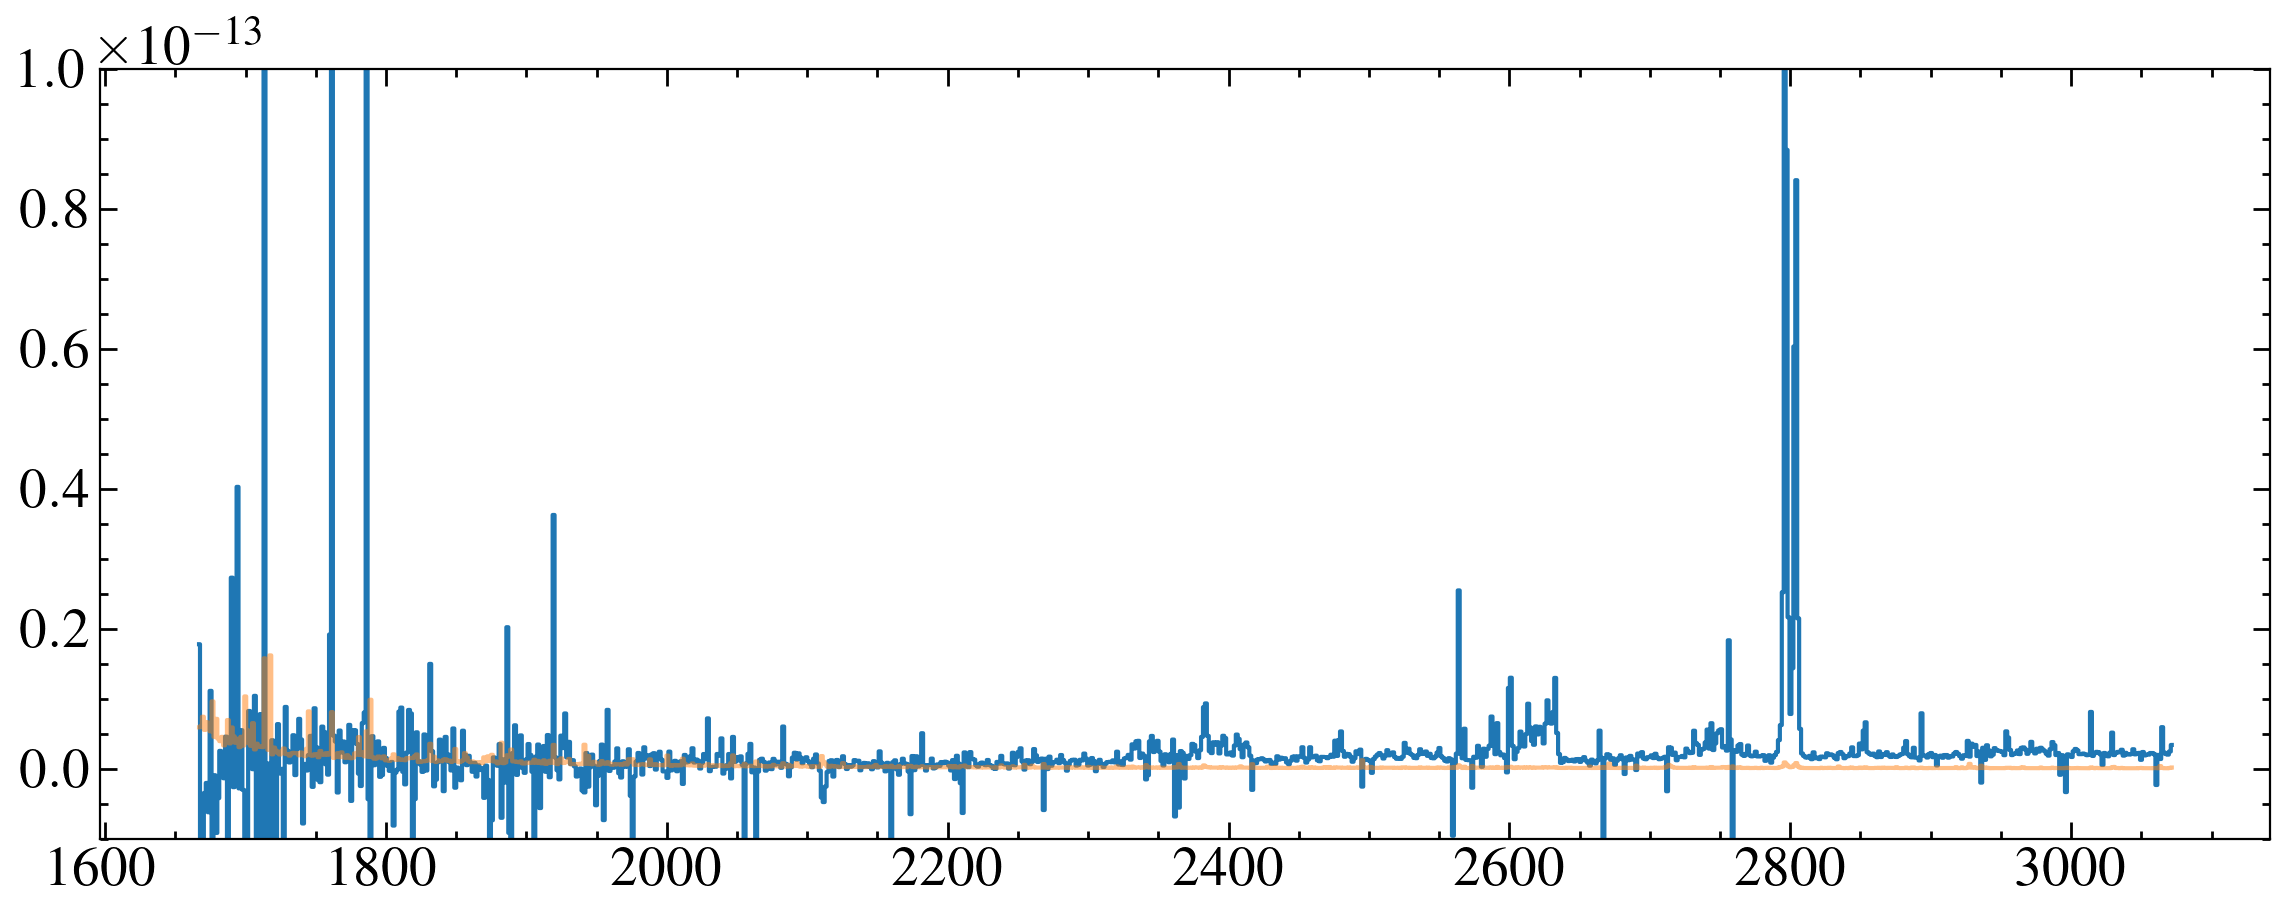

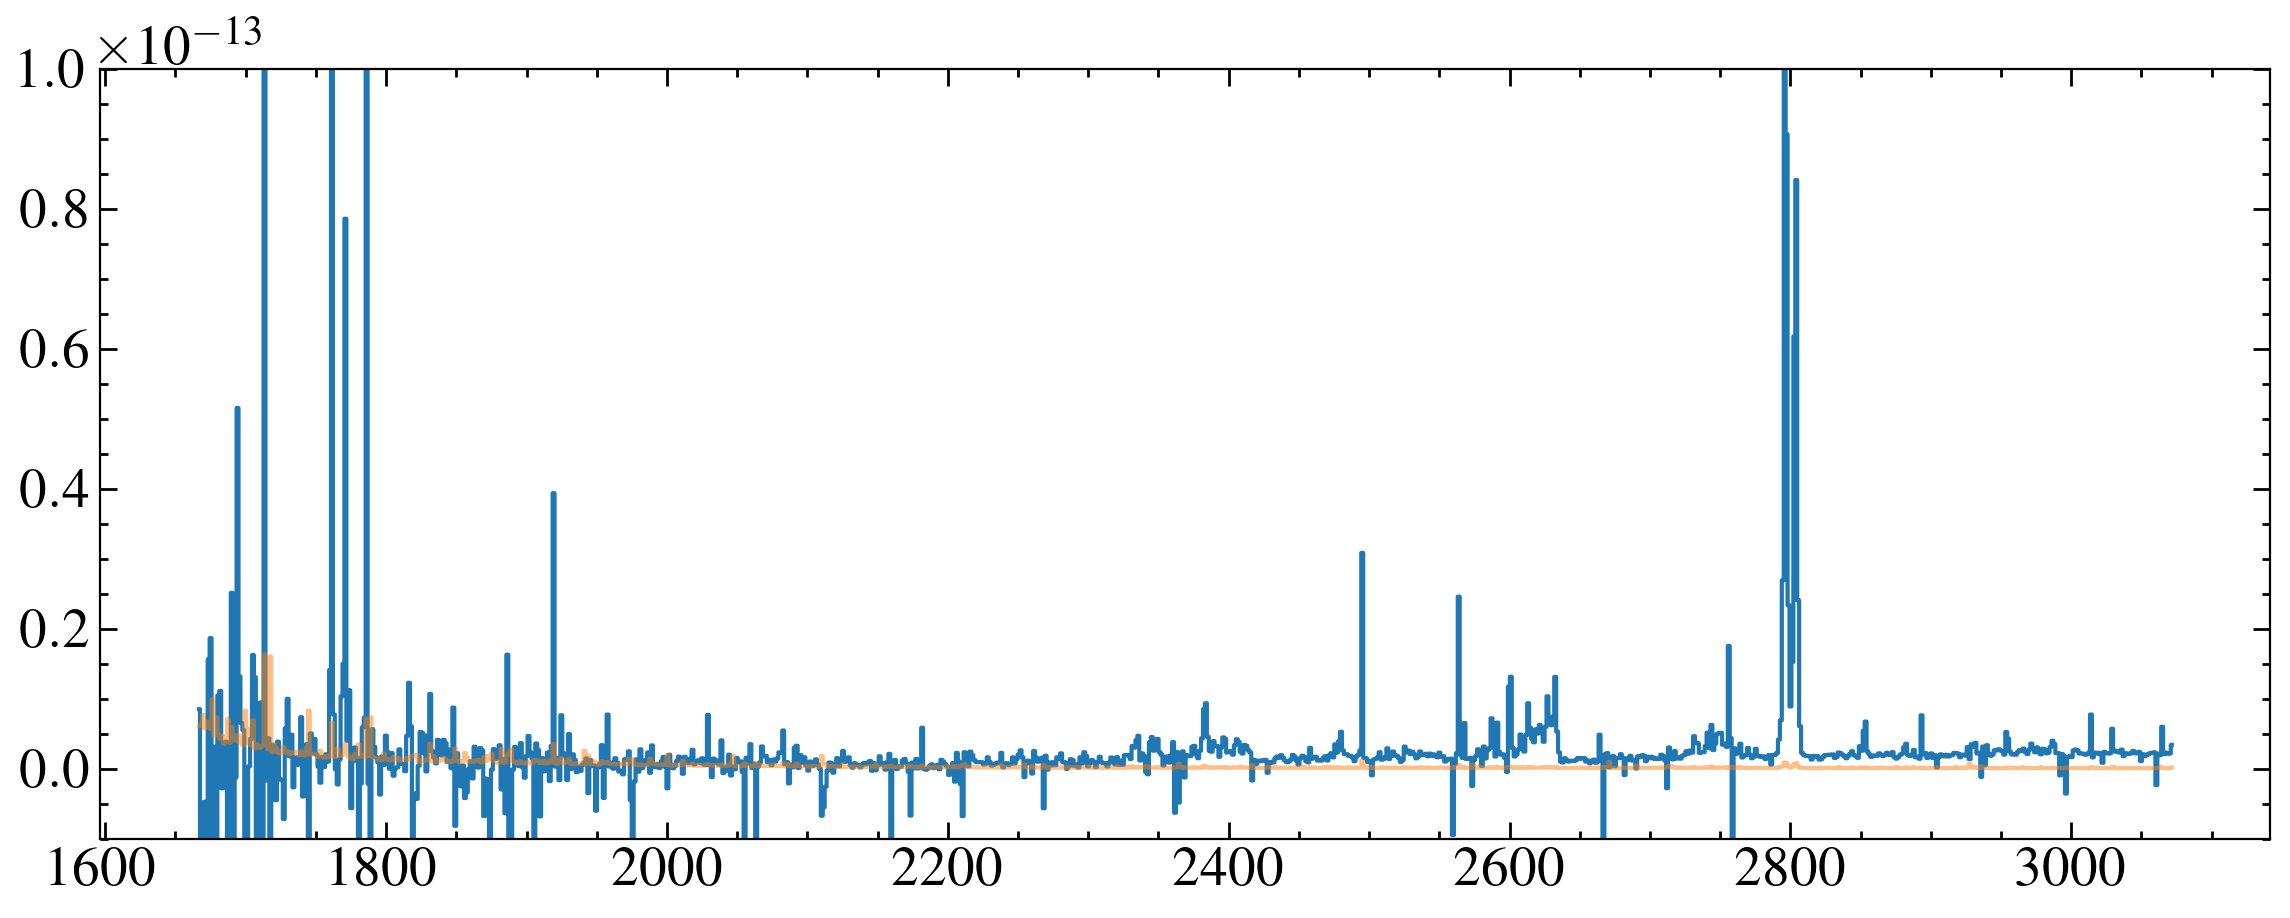

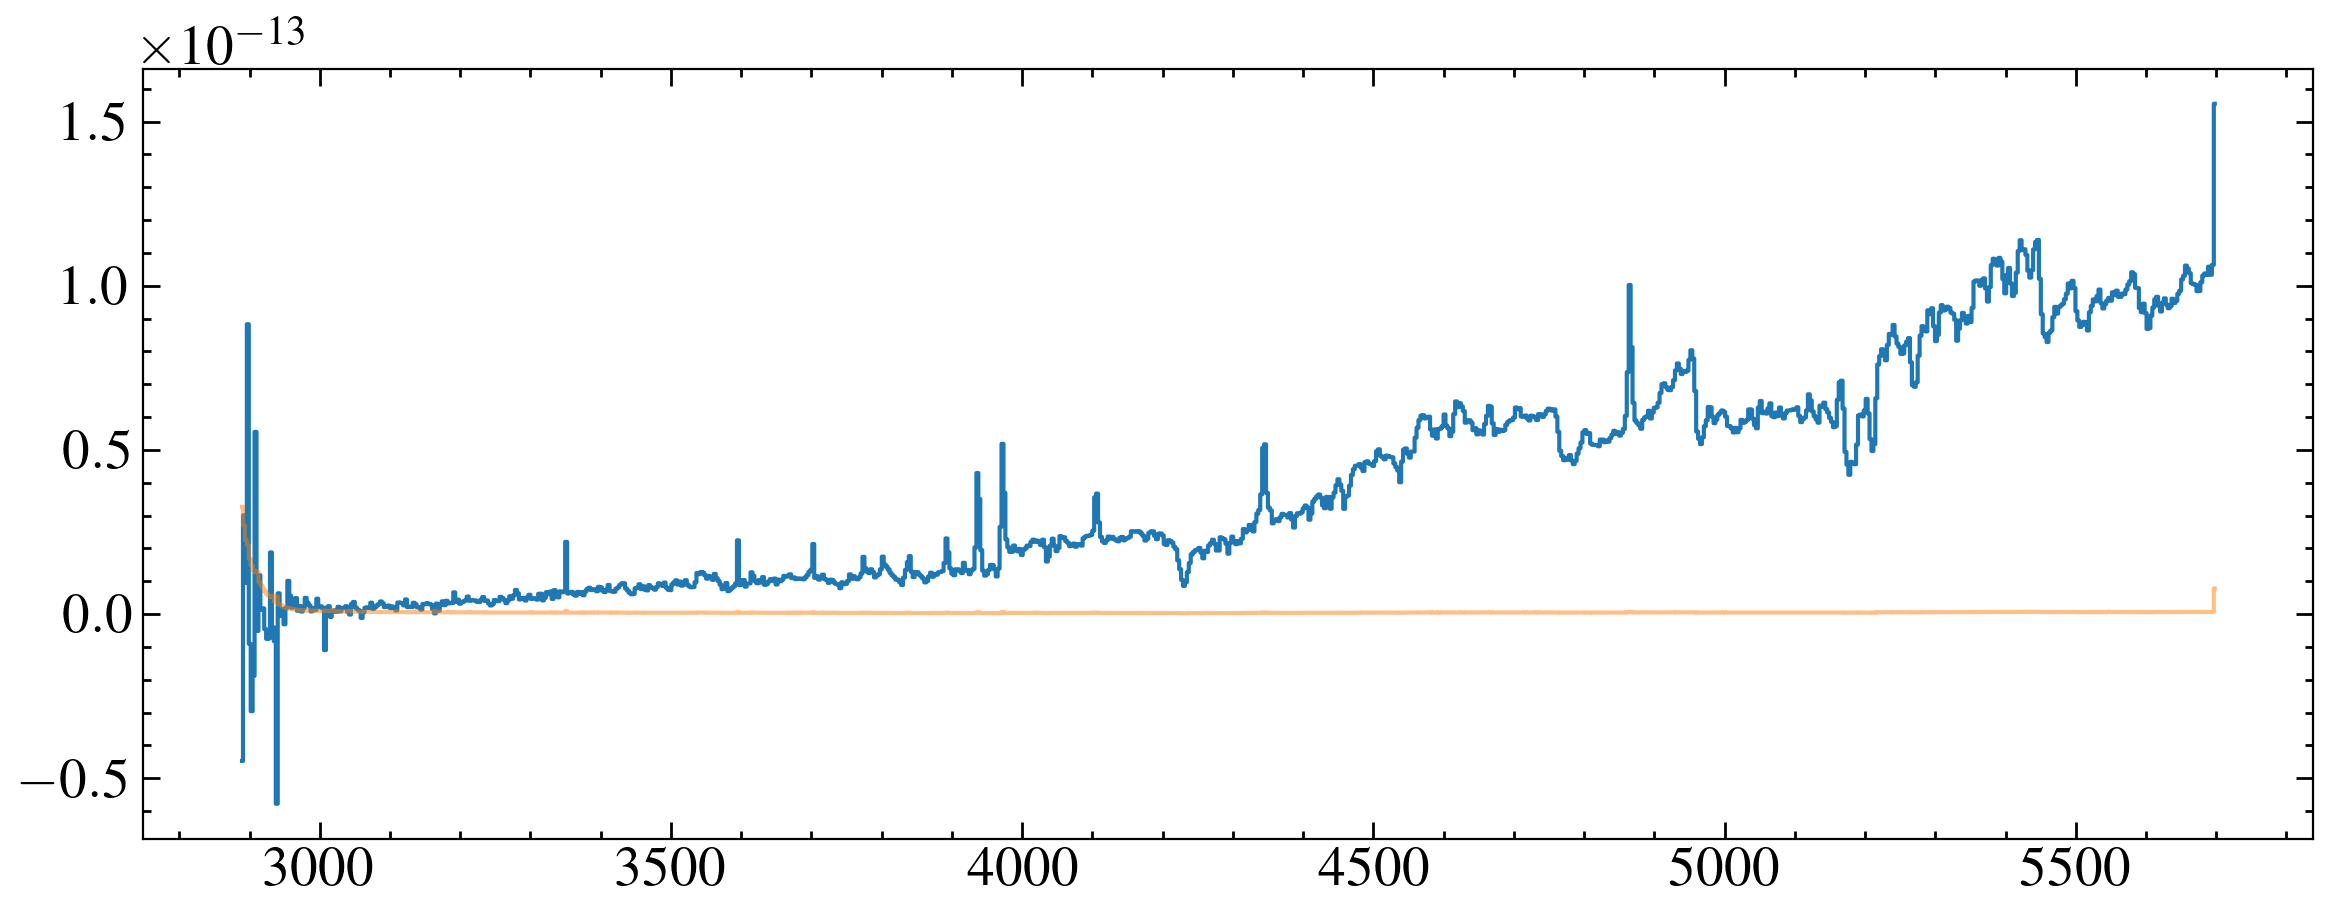

In [3]:
for x in sx1s:
    fig, ax = plt.subplots()
    print(x)
    grating = fits.getheader(x, 0)['OPT_ELEM'] 
    print(grating)
    data = fits.getdata(x, 1)[0]
    # print(data['A2Center'])
    w, f, e= data['WAVELENGTH'], data['FLUX'], data['ERROR']
    # if grating in ['G140M', 'G140L']:
        # mask = (w > 1160)
        
        # plt.ylim(-1e-16, 1e-16)
        # plt.axhline(0, ls='--', c='0.5')
    # if grating =='G230L':
    #     mask = (w > 1700)
    # if grating =='G430L':
    #     mask = (w > 3000)
    
    # w, f, e = w[mask], f[mask], e[mask]
    ax.step(w, f, where='mid')
    ax.step(w, e, where='mid', alpha=0.5)

    if grating == 'G230LB':
        ax.set_ylim(-1e-14, 1e-13)
    # plt.show()



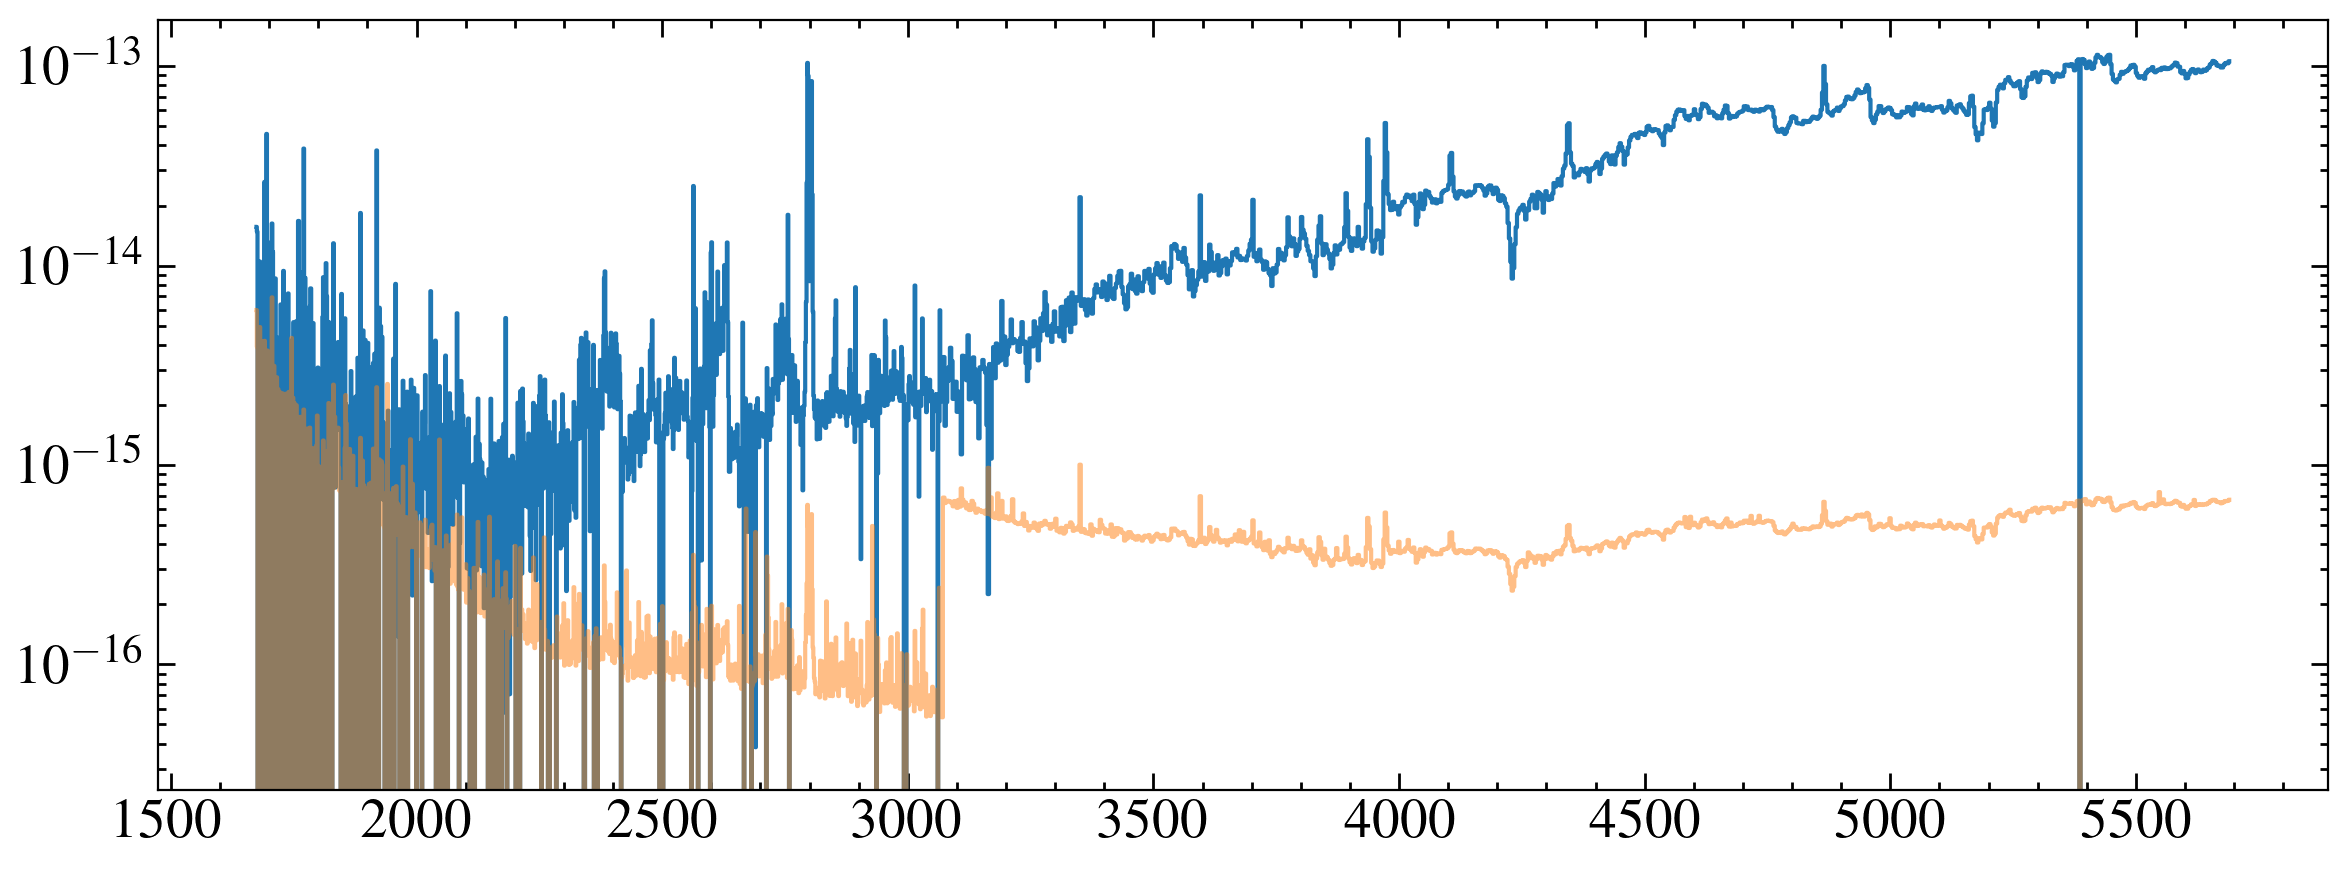

In [4]:
fig, ax = plt.subplots()

data = fits.getdata(cspecs[1], 1)[0]
w, f, e= data['WAVELENGTH'], data['FLUX'], data['ERROR']

mask = f < 1.5e-13

w, f, e = w[mask], f[mask], e[mask]

ax.step(w, f, where='mid')
ax.step(w, e, where='mid', alpha=0.5)

ax.set_yscale('log')

moment of truth...

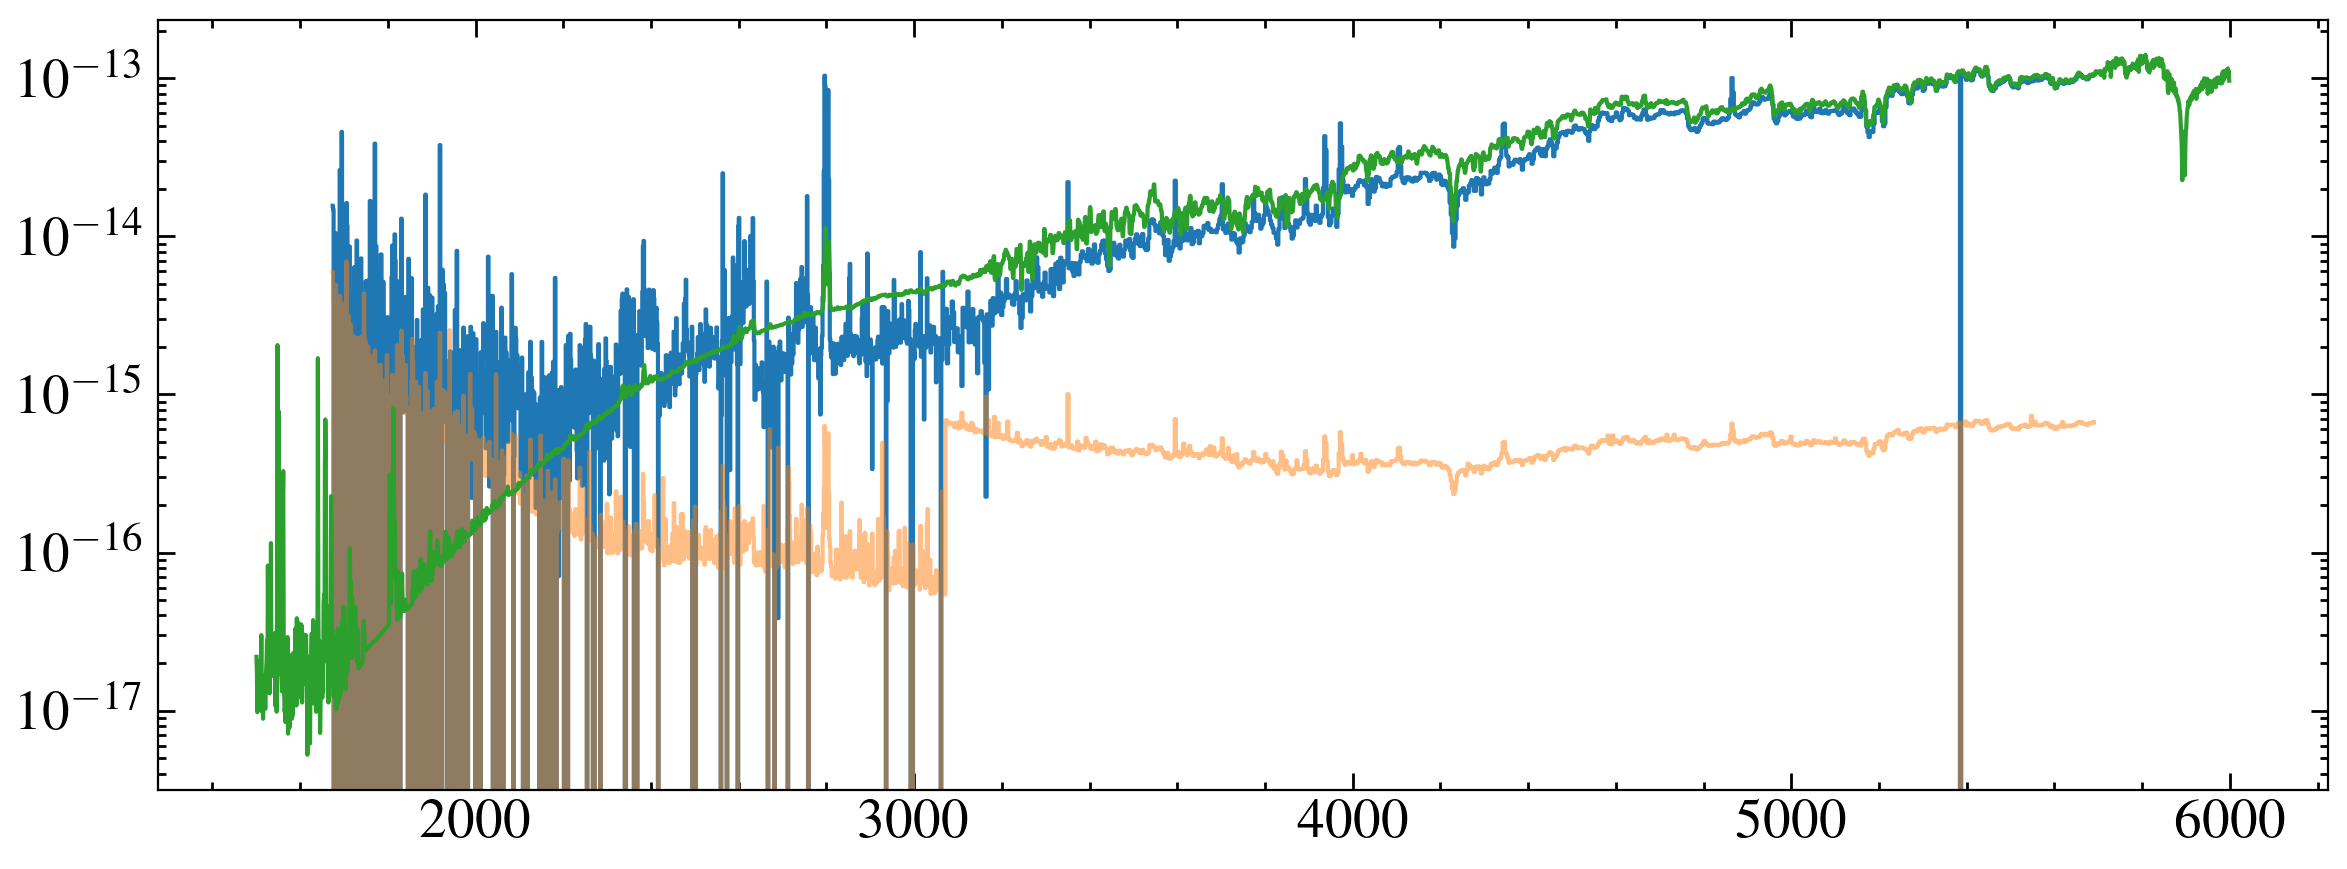

In [5]:
fig, ax = plt.subplots()

data = fits.getdata(cspecs[1], 1)[0]
w, f, e= data['WAVELENGTH'], data['FLUX'], data['ERROR']

mask = f < 1.5e-13

w, f, e = w[mask], f[mask], e[mask]

ax.step(w, f, where='mid')
ax.step(w, e, where='mid', alpha=0.5)

ax.set_yscale('log')
mw, mf = np.loadtxt('gj207_model.dat', unpack=True)

ax.plot(mw, mf)

Fainter than expected, scaling a bit

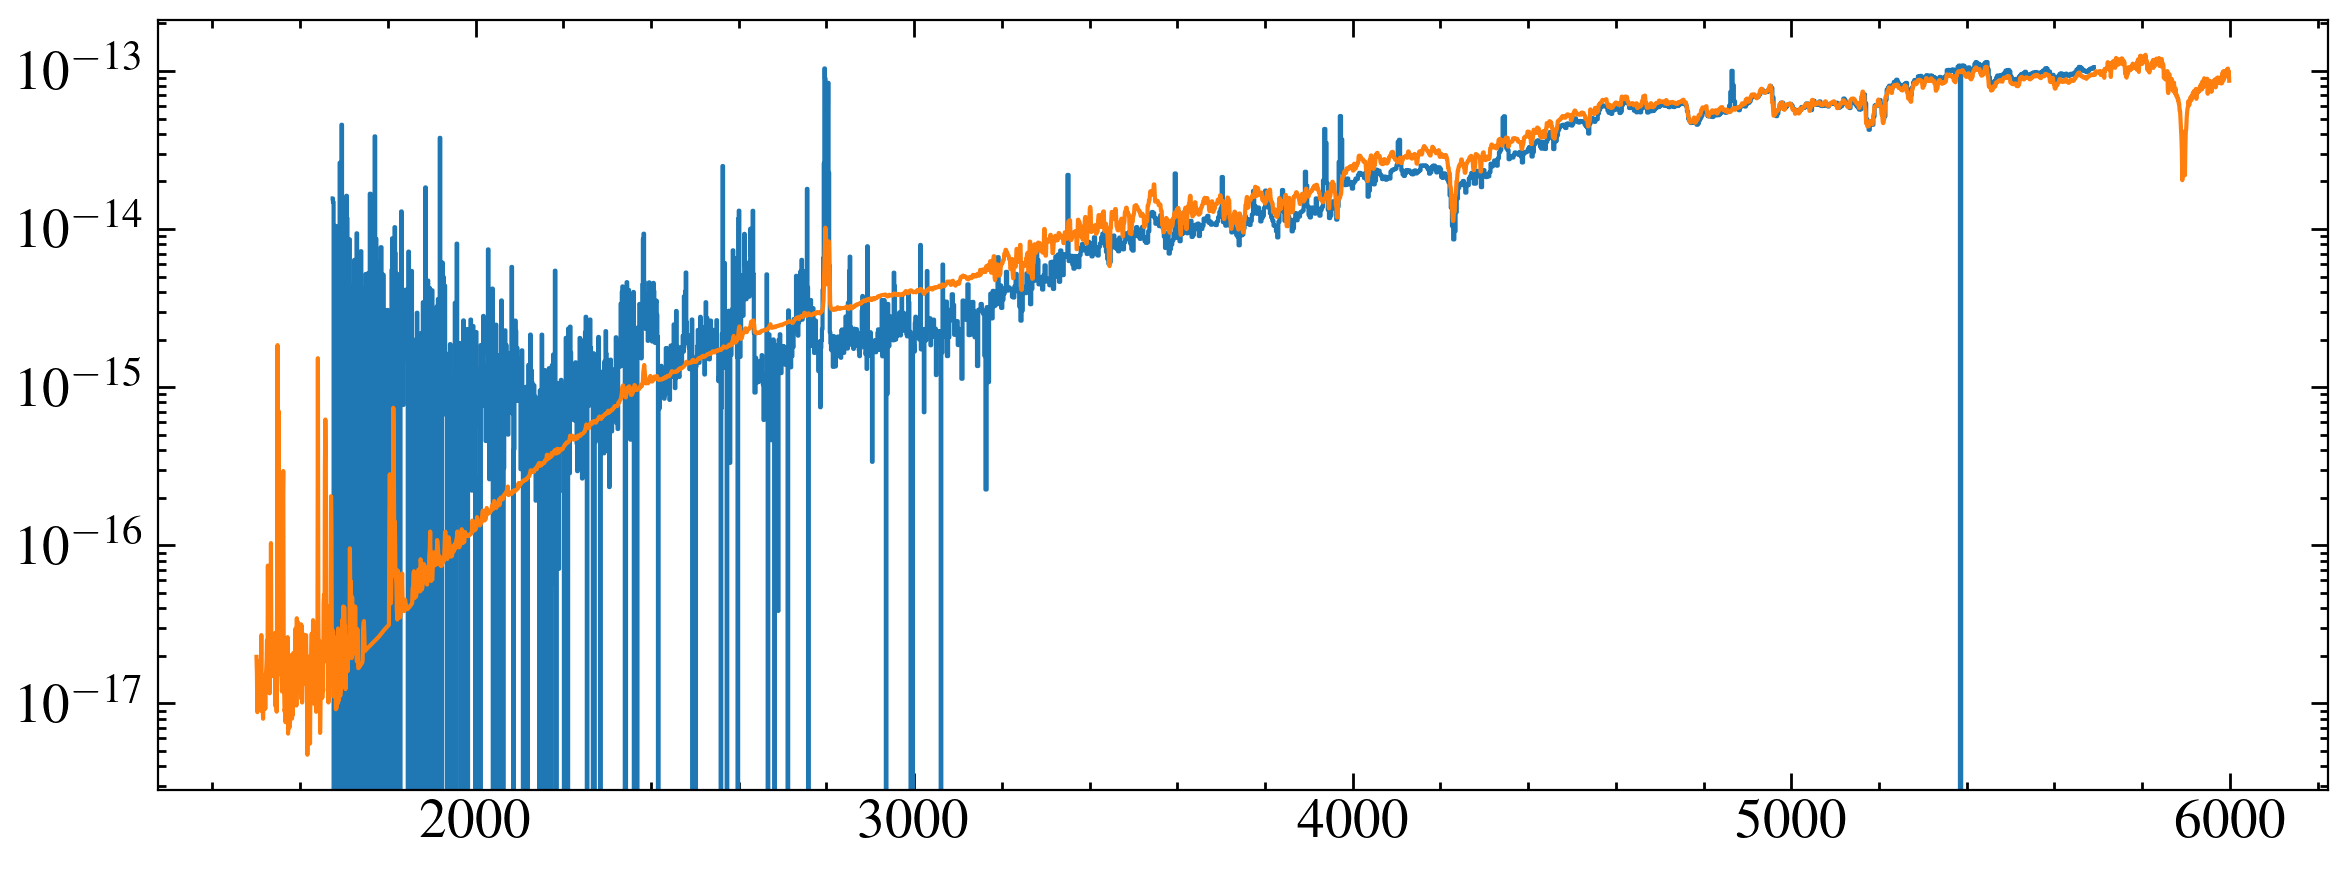

In [6]:
fig, ax = plt.subplots()


ax.step(w, f, where='mid')
# ax.step(w, e, where='mid', alpha=0.5)

ax.set_yscale('log')

ax.plot(mw, mf*0.9)

So a cooler white dwarf component?

In [7]:
pdata = fits.getdata('{}../../gj176/hlsp_muscles_multi_multi_gj176_broadband_v22_adapt-const-res-sed.fits'.format(path))
# data = fits.getdata('{}/gj176/hlsp_muscles_multi_multi_gj176_broadband_v22_var-res-sed.fits'.format(path))
gw, gf = pdata['WAVELENGTH'], pdata['FLUX']

In [8]:
d_gj176 = 1/(105.42748417135273e-3)*u.pc
d_gj207 = 1/(63.35970667464679e-3)*u.pc
rwd = 0.0128*u.Rsun

gj_scale = (d_gj176/d_gj207)**2
wd_scale = (rwd.to(u.m)/d_gj207.to(u.m))**2

print(gj_scale, wd_scale)

0.36117578882221896 3.3434064163686346e-22


(2e-18, 2e-13)

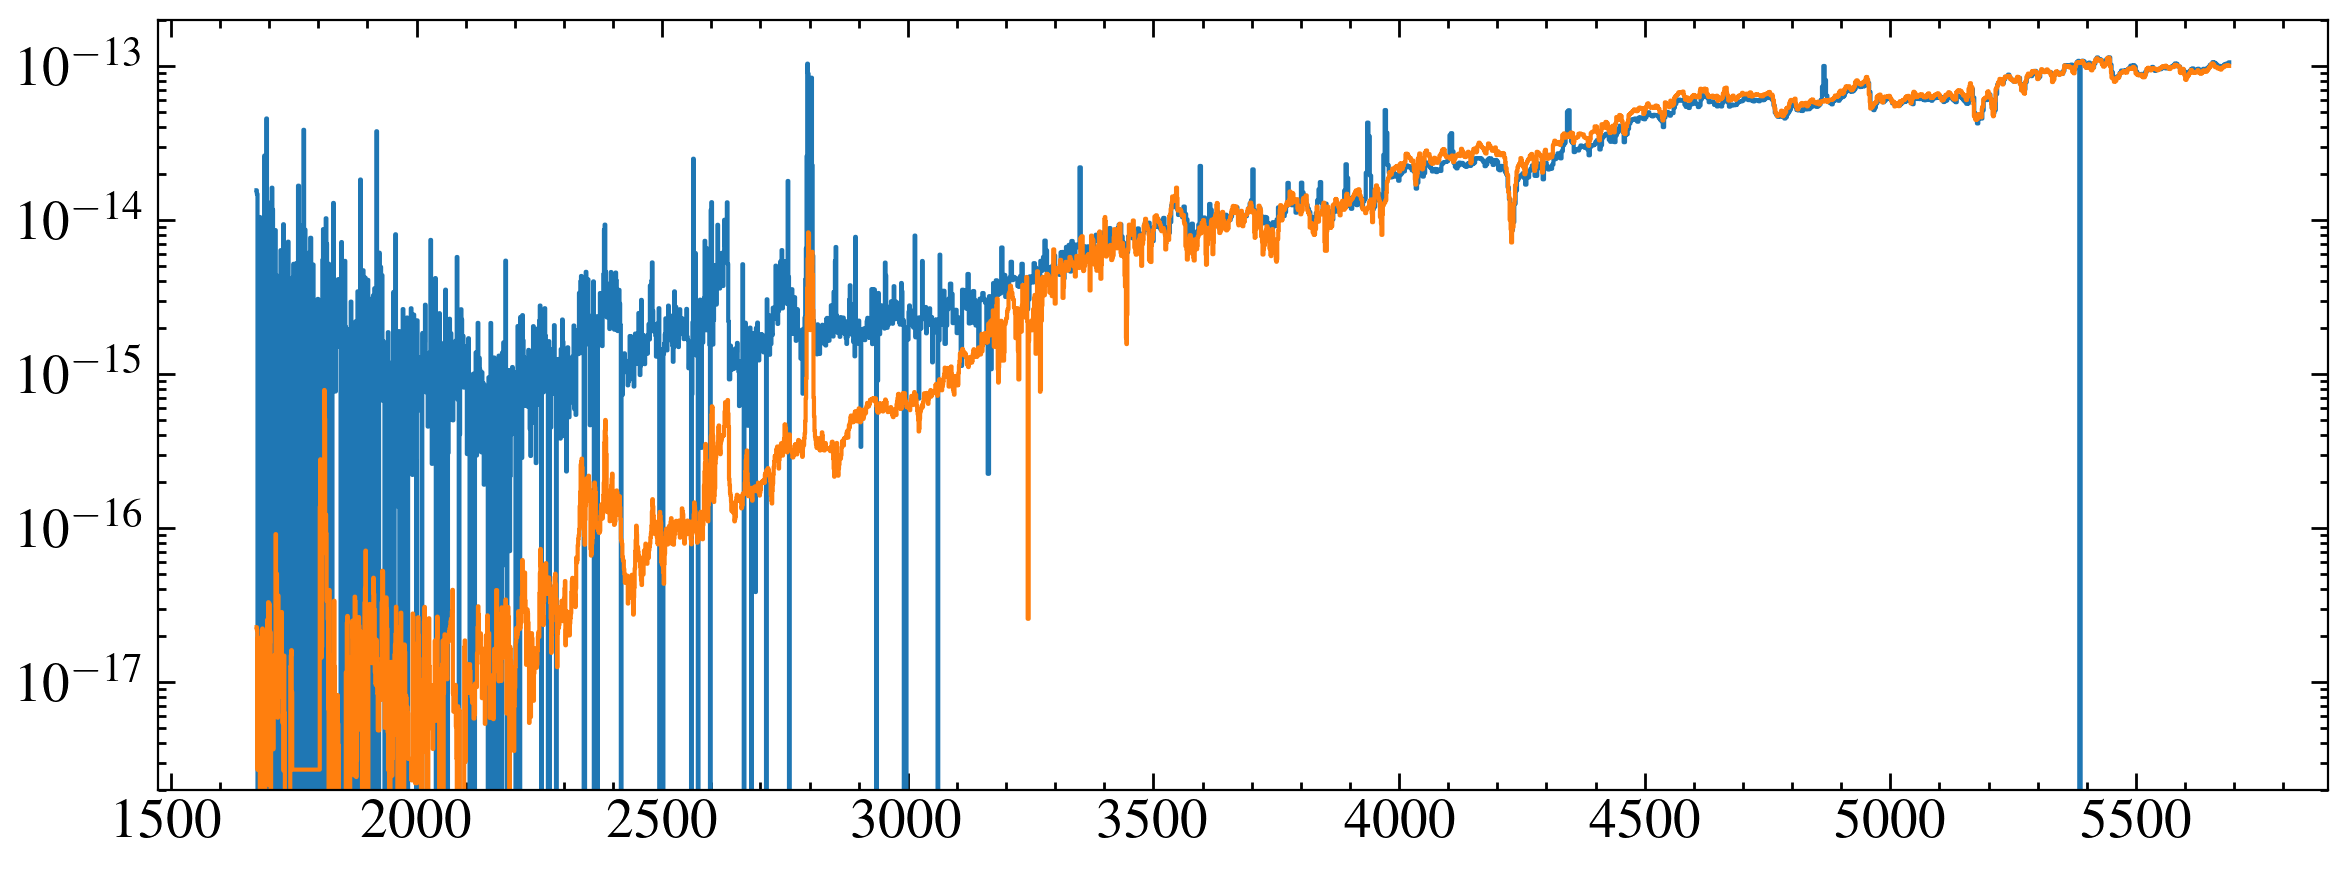

In [9]:
fig, ax = plt.subplots()


ax.step(w, f, where='mid')
# ax.step(w, e, where='mid', alpha=0.5)

gmask = (gw > w[0]) & (gw < w[-1])

scale2 = 1.4691682547408482 #from pt2 notebook 

ax.step(gw[gmask], gf[gmask]*gj_scale/scale2, where='mid')

ax.set_yscale('log')

ax.set_ylim(2e-18, 2e-13)

# ax.plot(mw, mf)

Check for significant differences

/media/david/2tb_ext_hd/hddata/carmenes_binary/gj207.1/hst/ofem02010_sx1.fits
G230LB
/media/david/2tb_ext_hd/hddata/carmenes_binary/gj207.1/hst/ofem02020_sx1.fits
G230LB


(-1e-14, 1e-13)

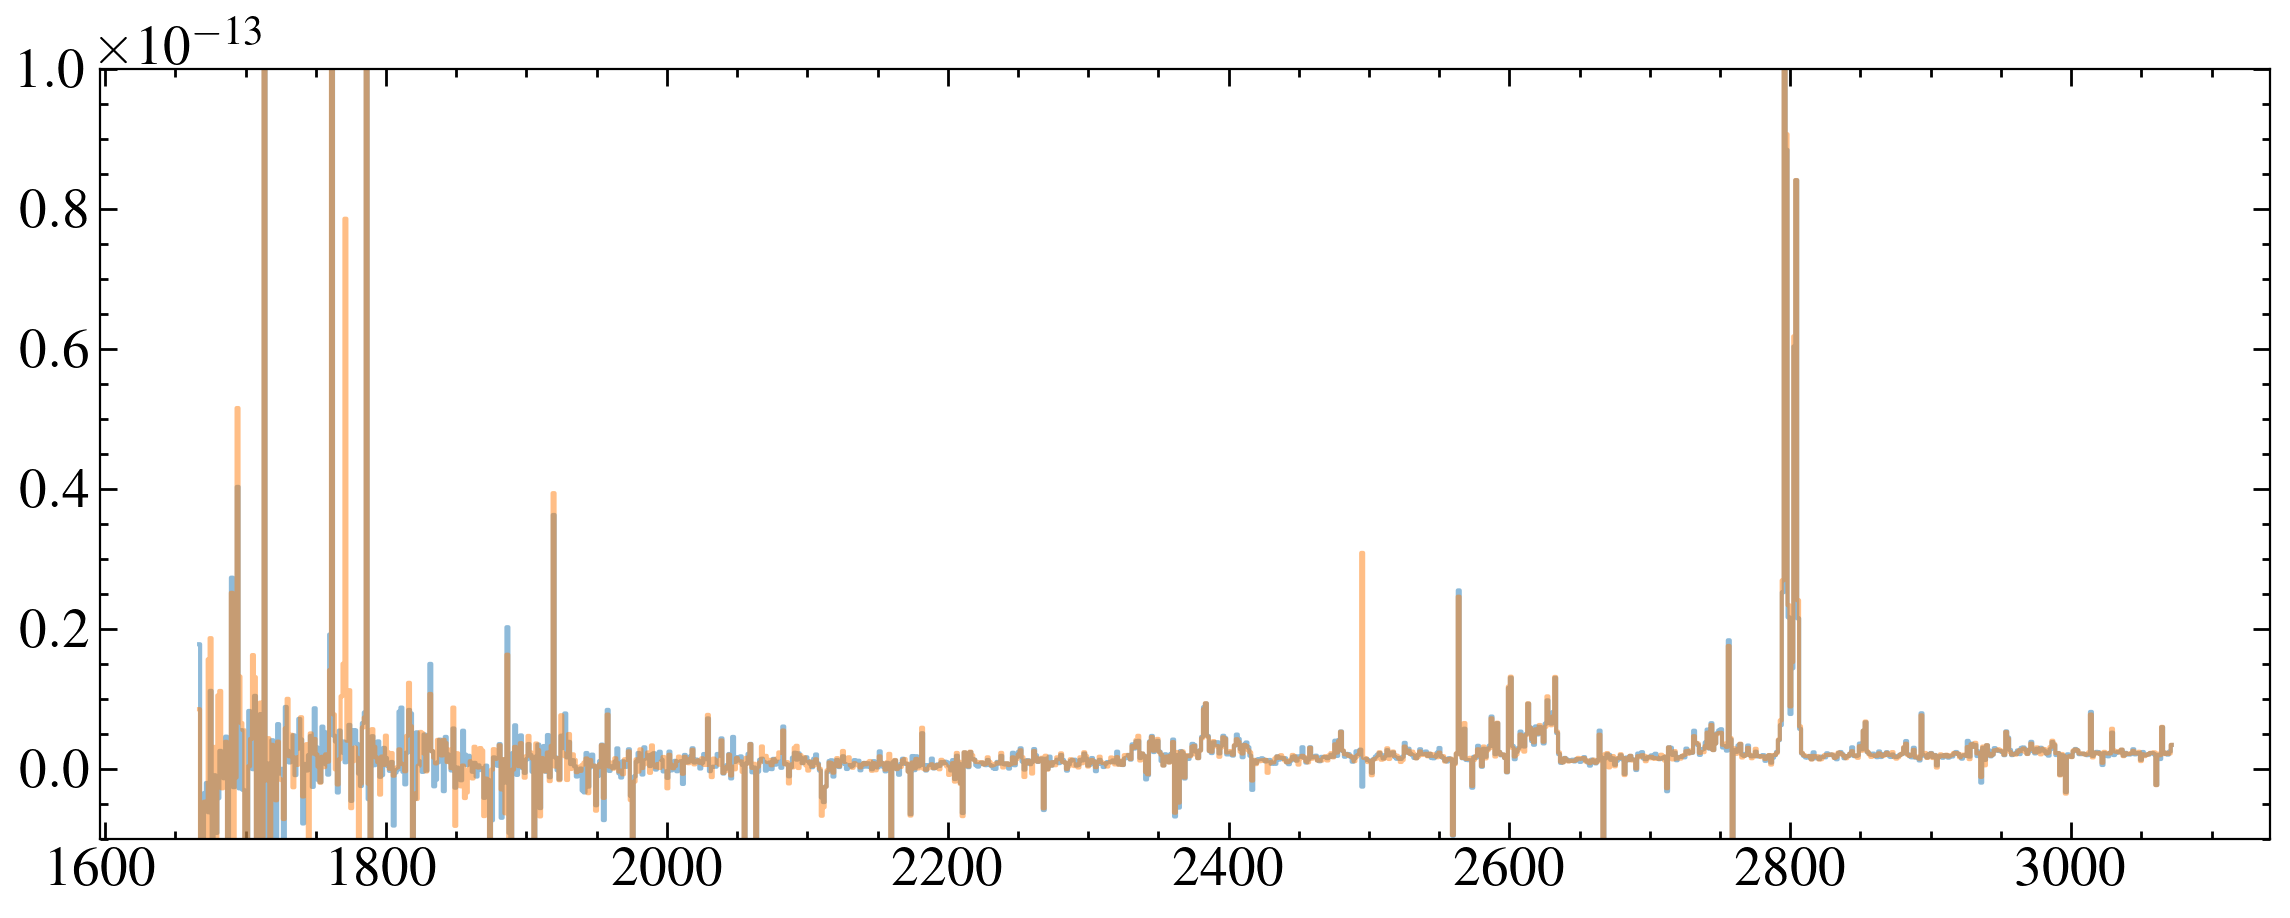

In [10]:
fig, ax = plt.subplots()

for x in sx1s[0:2]:
    print(x)
    grating = fits.getheader(x, 0)['OPT_ELEM'] 
    print(grating)
    data = fits.getdata(x, 1)[0]
    # print(data['A2Center'])
    w, f, e= data['WAVELENGTH'], data['FLUX'], data['ERROR']
    # if grating in ['G140M', 'G140L']:
        # mask = (w > 1160)
        
        # plt.ylim(-1e-16, 1e-16)
        # plt.axhline(0, ls='--', c='0.5')
    # if grating =='G230L':
    #     mask = (w > 1700)
    # if grating =='G430L':
    #     mask = (w > 3000)
    
    # w, f, e = w[mask], f[mask], e[mask]
    ax.step(w, f, where='mid', alpha=0.5)
    # ax.step(w, e, where='mid', alpha=0.5)

    # if grating == 'G230LB':
ax.set_ylim(-1e-14, 1e-13)
# ax.set_xlim(2200, 3050)
# ax.set_xlim(2750, 2850)

UVOT fluxes

[1.2576399e-15] 1.56920904942379e-15 [0.80144828]
[3.5183853e-17] 1.0557802908380694e-17
[35.744804]


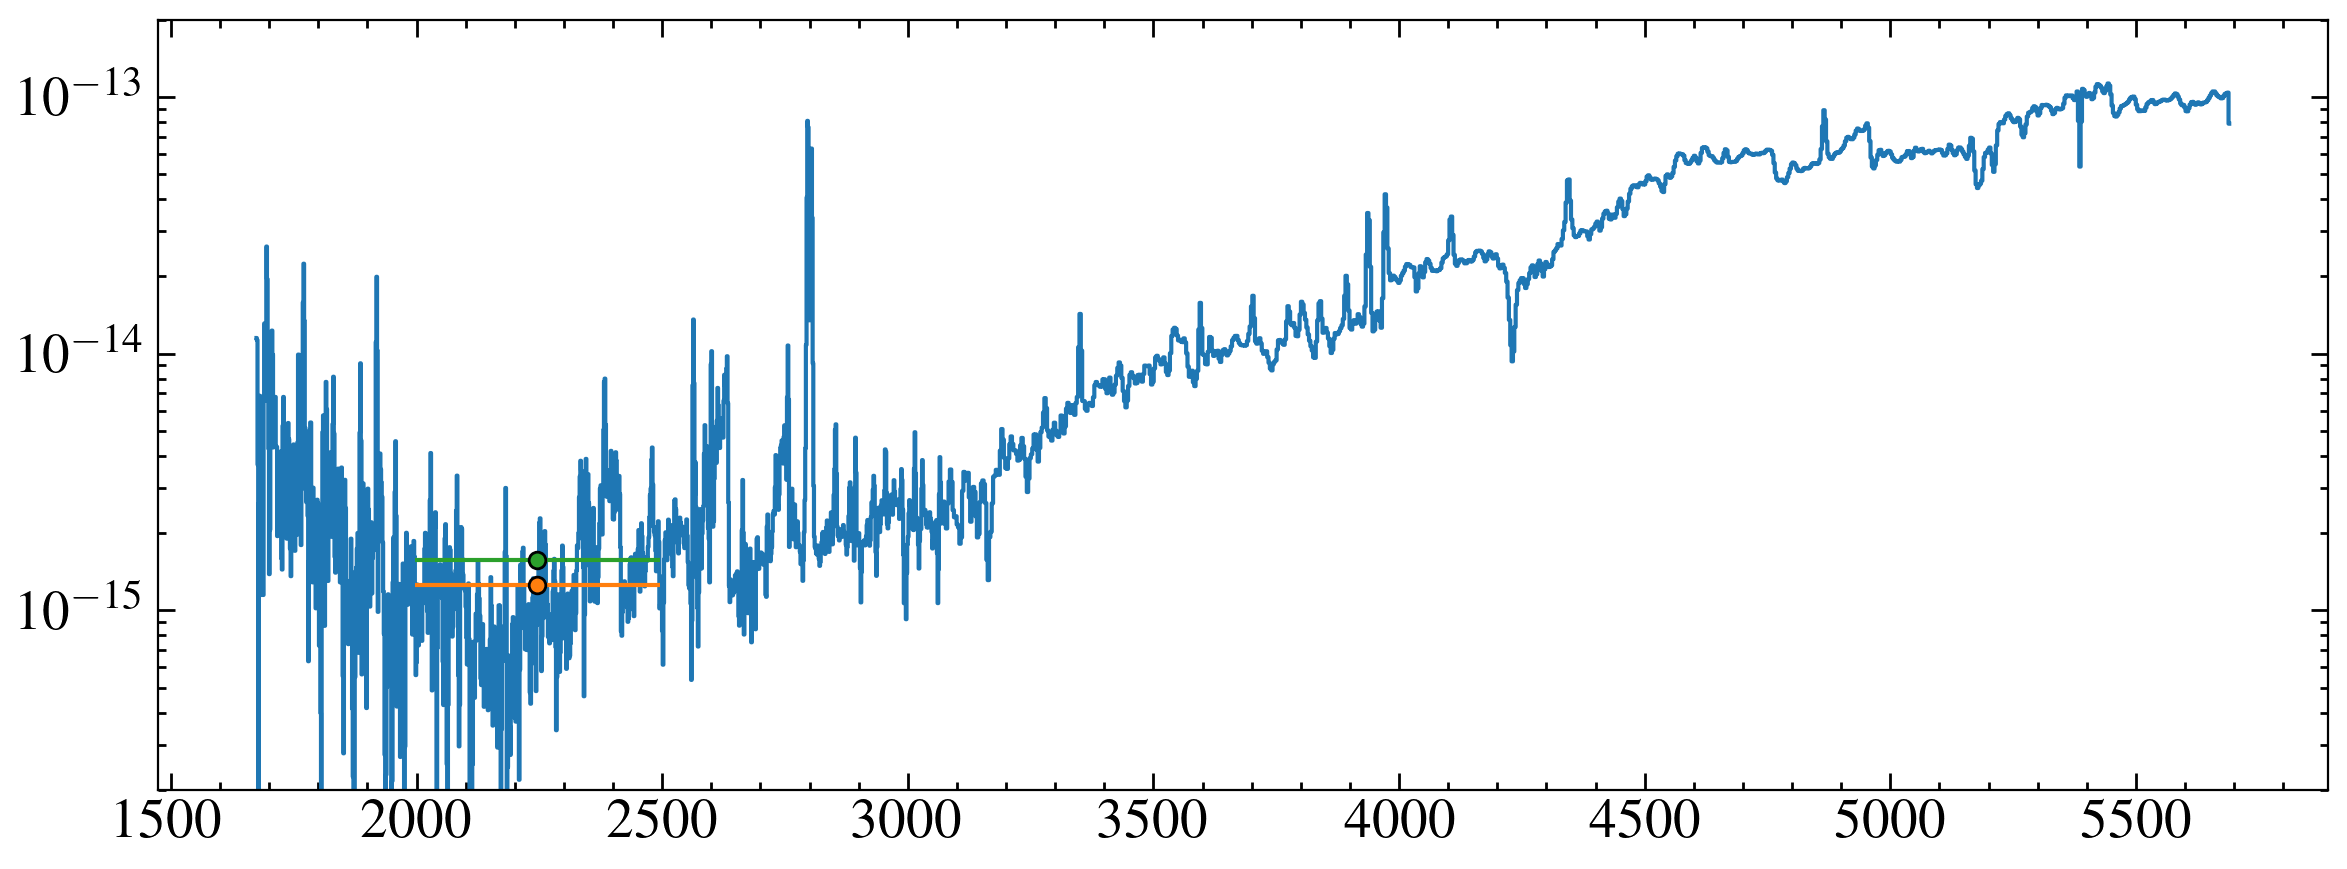

In [11]:
def make_phot(bp_w, bp_cc, w, f, e=0):
    mask = (w >= bp_w[0]) & (w <= bp_w[-1])
    w, f = w[mask], f[mask]
    bb_cci = np.interp(w, bp_w, bp_cc, left=0, right=0)
    flux = np.trapezoid(f*bb_cci, w)/np.trapezoid(bb_cci, w)
    if isinstance(e, int) != True:
        e = e[mask]
        intf = np.trapezoid(f, w)
        inte = (np.sum(e[1:]**2 * np.diff(w)**2))**0.5
        flux_error = (inte/intf)*flux
        return flux, flux_error
    else:
        return flux 


data = fits.getdata(cspecs[1], 1)[0]
w, f, e= data['WAVELENGTH'], data['FLUX'], data['ERROR']

mask = f < 1.5e-13

w, f, e = w[mask], f[mask], e[mask]

uvm2 = fits.getdata('/media/david/2tb_ext_hd/hddata/carmenes_binary/gj207.1/swift/uvot/00014457003/uvot/products/gj207d1_uvm2_phot.fits',1)

uw = 2246
ufwhm =498
uf, ue = uvm2['AB_FLUX_AA'], uvm2['AB_FLUX_AA_ERR']


fig, ax = plt.subplots()

fi = convolve(f, Box1DKernel(2))
ax.step(w, fi, where='mid')

# gmask = (gw > w[0]) & (gw < w[-1])
# ax.step(gw[gmask], gf[gmask]*gj_scale/scale2, where='mid')

ax.set_yscale('log')

ax.set_ylim(2e-16, 2e-13)

ax.errorbar(uw, uf, yerr=ue, xerr=ufwhm/2, marker='o', ls='none', markeredgecolor='k')
# ax.plot(mw, mf)

bp_w, bp_cc = np.loadtxt('/home/david/work/filters/uvot/Swift_UVOT.UVM2.dat', unpack=True)
simphot, simphot_e = make_phot(bp_w, bp_cc, w, f, e=e)


ax.errorbar(uw, simphot, yerr=simphot_e, xerr=ufwhm/2, marker='o', ls='none', markeredgecolor='k')

print(uf, simphot, uf/simphot)
print(ue, simphot_e)
print(uf/ue)


    # ax1.plot(bp_w, bp_cc, ls='--', c='C2')
    #     ax1.fill_between(bp_w, bp_cc, alpha=0.3, color='C2')
    #     ax1.annotate(r'${}$'.format(flt), (phot_w[psmask][i].value, 0.2), alpha=0.5)
    # flts.append(flt)
    
pre_phot, pre_phot_e = simphot, simphot_e


So maybe a touch of red leak. Wait until the final Swift data, but can use it to fit the equation from https://www.stsci.edu/files/live/sites/www/files/home/hst/instrumentation/stis/documentation/instrument-science-reports/_documents/2022_05.pdf

/tmp/ipykernel_8738/2423513856.py:3: RuntimeWarning: invalid value encountered in divide
  sn = convolve(f/e, Box1DKernel(5))


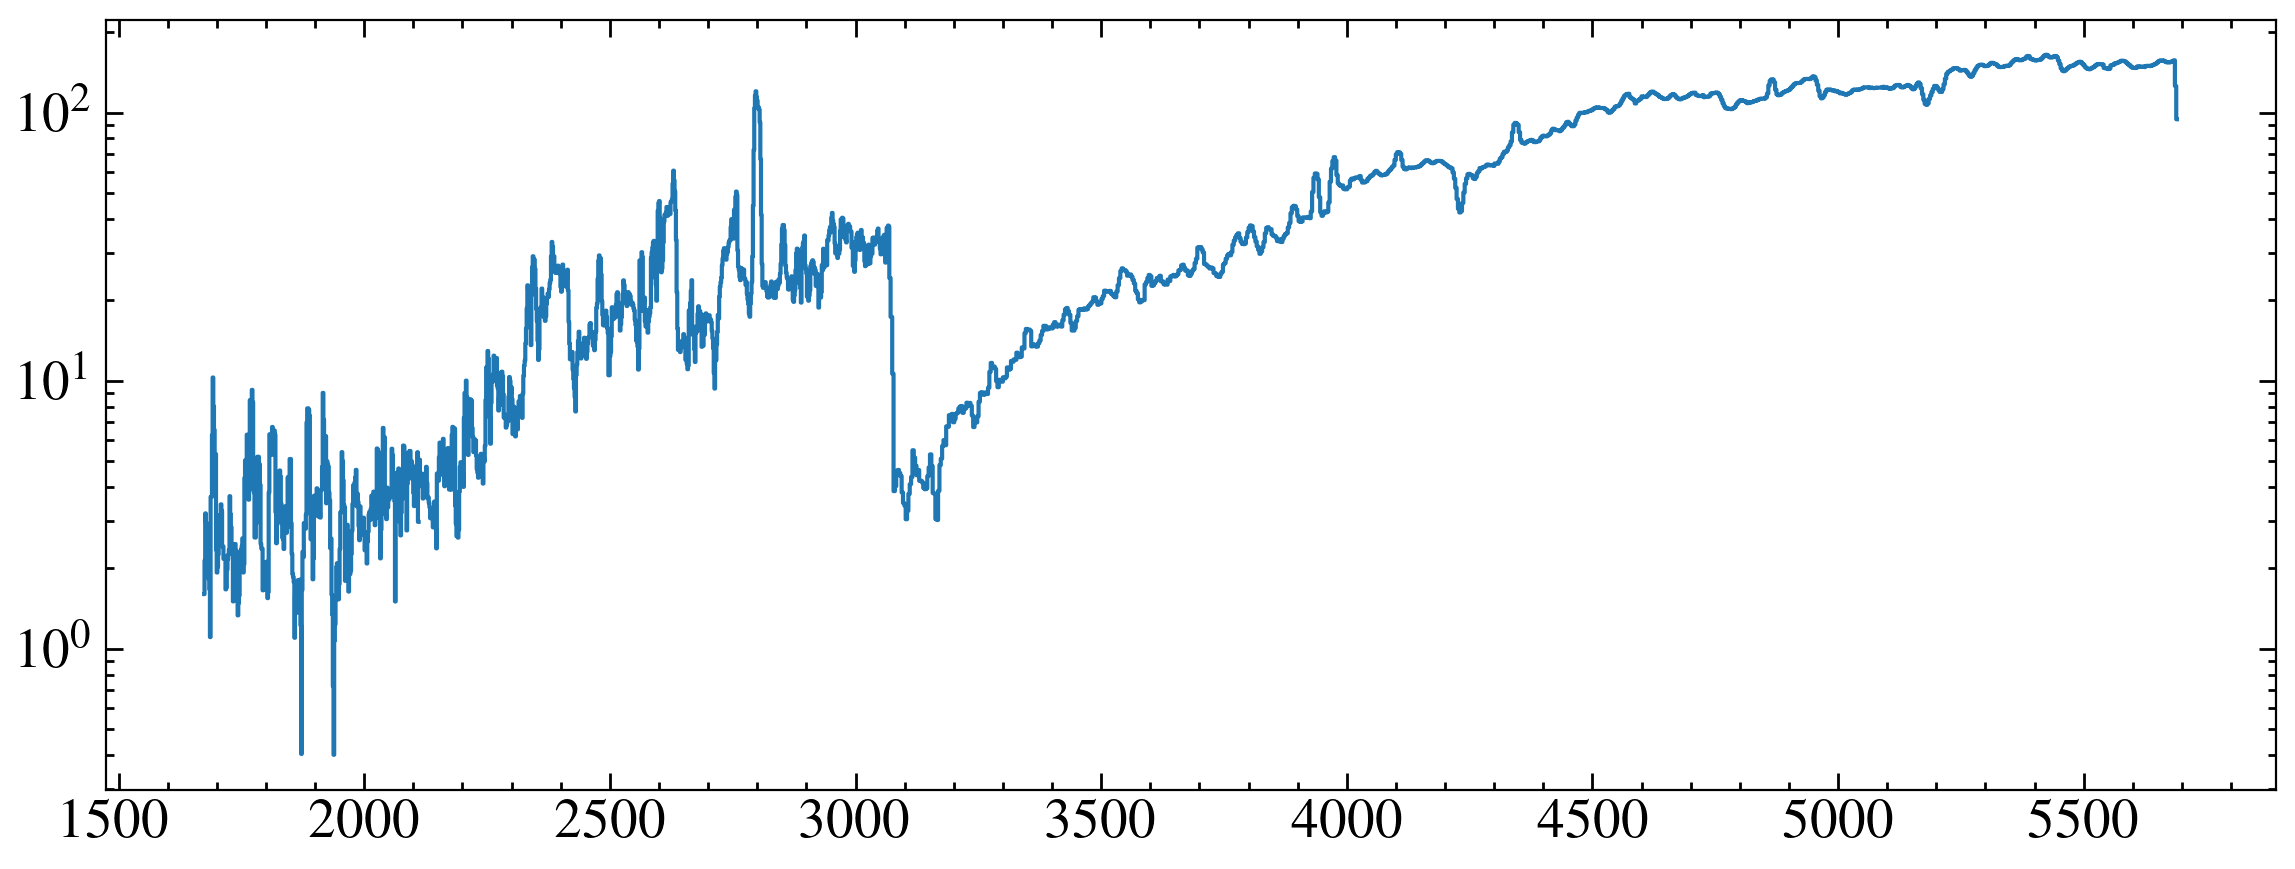

In [12]:
fig, ax = plt.subplots()

sn = convolve(f/e, Box1DKernel(5))

ax.step(w, sn, where='mid')

ax.set_yscale('log')

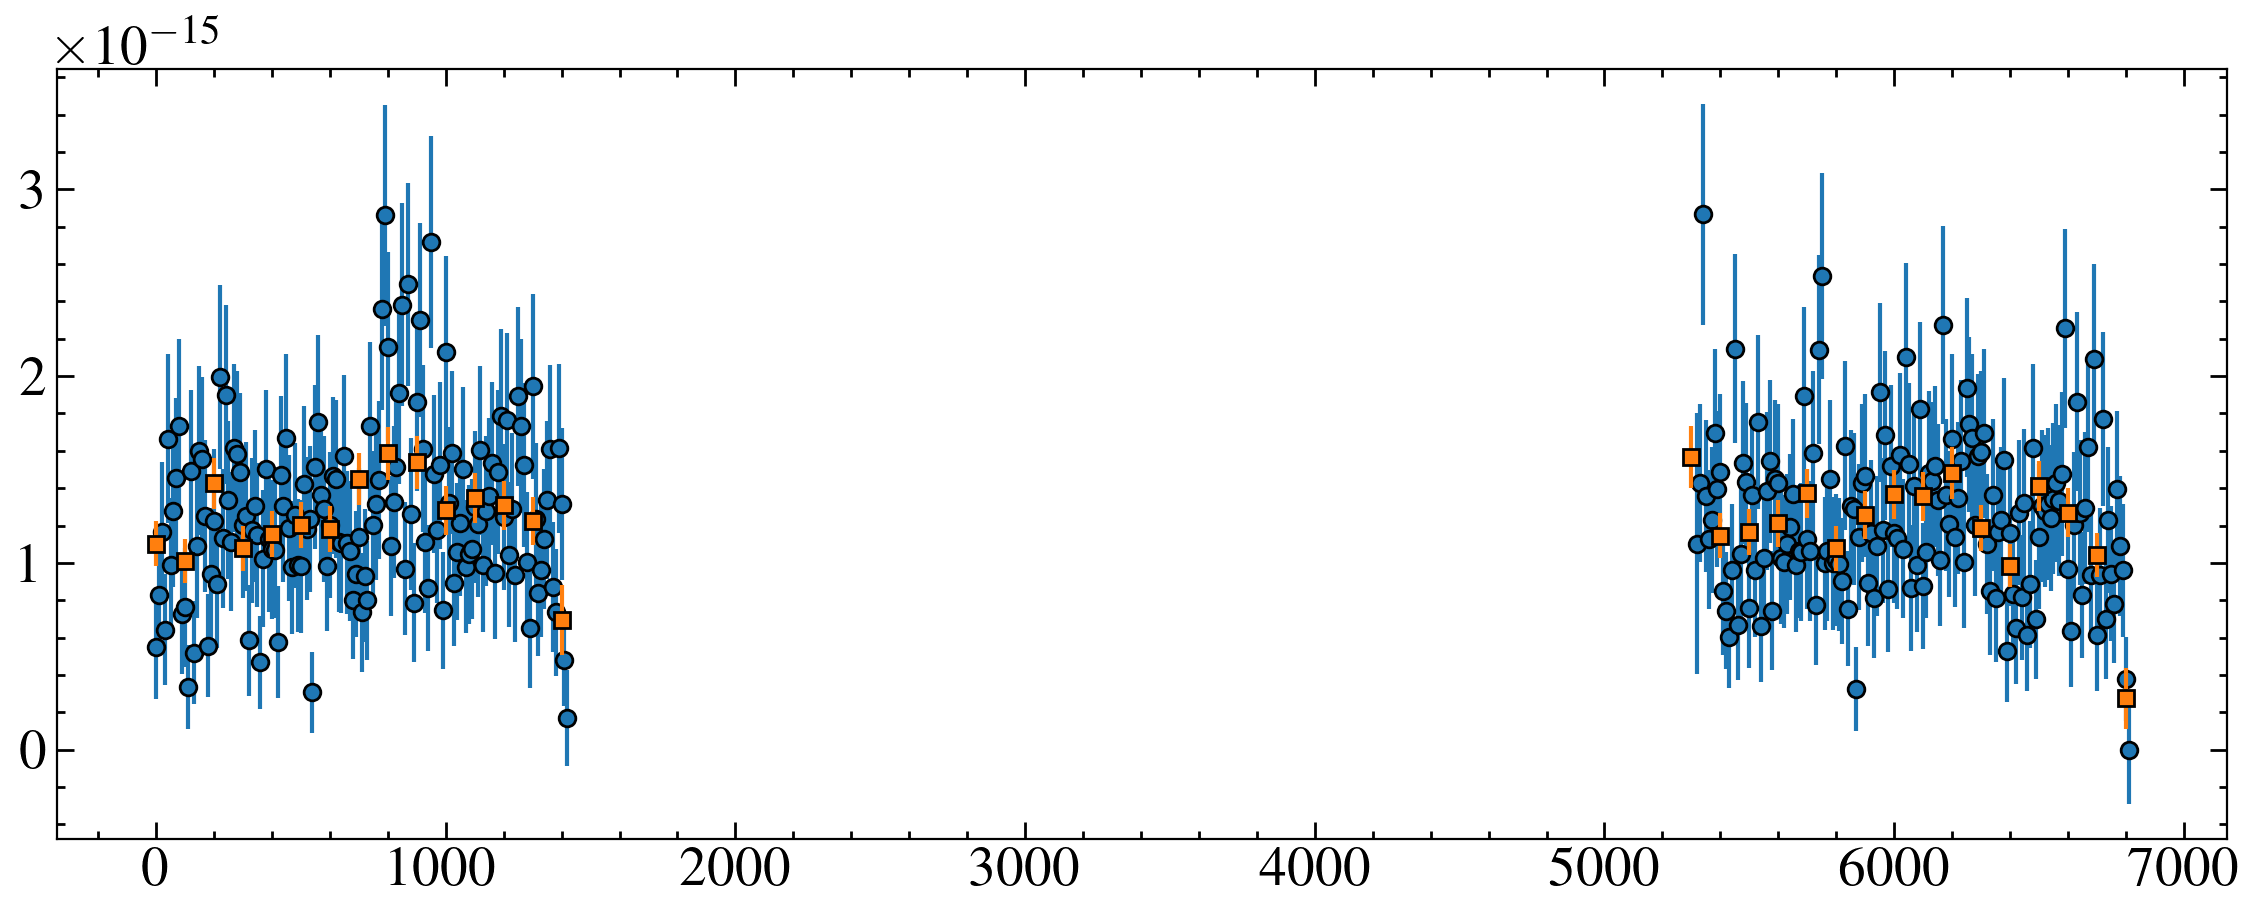

In [13]:
lcpath = '/media/david/2tb_ext_hd/hddata/carmenes_binary/gj207.1/swift/uvot/00014457003/uvot/event/'
lcs = glob.glob('{}gj207*'.format(lcpath))

ref_mjd = 51910
ref_sec = ref_mjd * 86400

m = ['o', 's']
zorders = [-10, 10]
fig, ax = plt.subplots()
for i,  lc in enumerate(lcs[::-1]):
    data = fits.getdata(lc, 1)
    ax.errorbar(data['TIME']-data['TIME'][0], data['AB_FLUX_AA'], yerr = data['AB_FLUX_AA_ERR'], marker=m[i], ls='none', markeredgecolor='k', zorder=zorders[i])


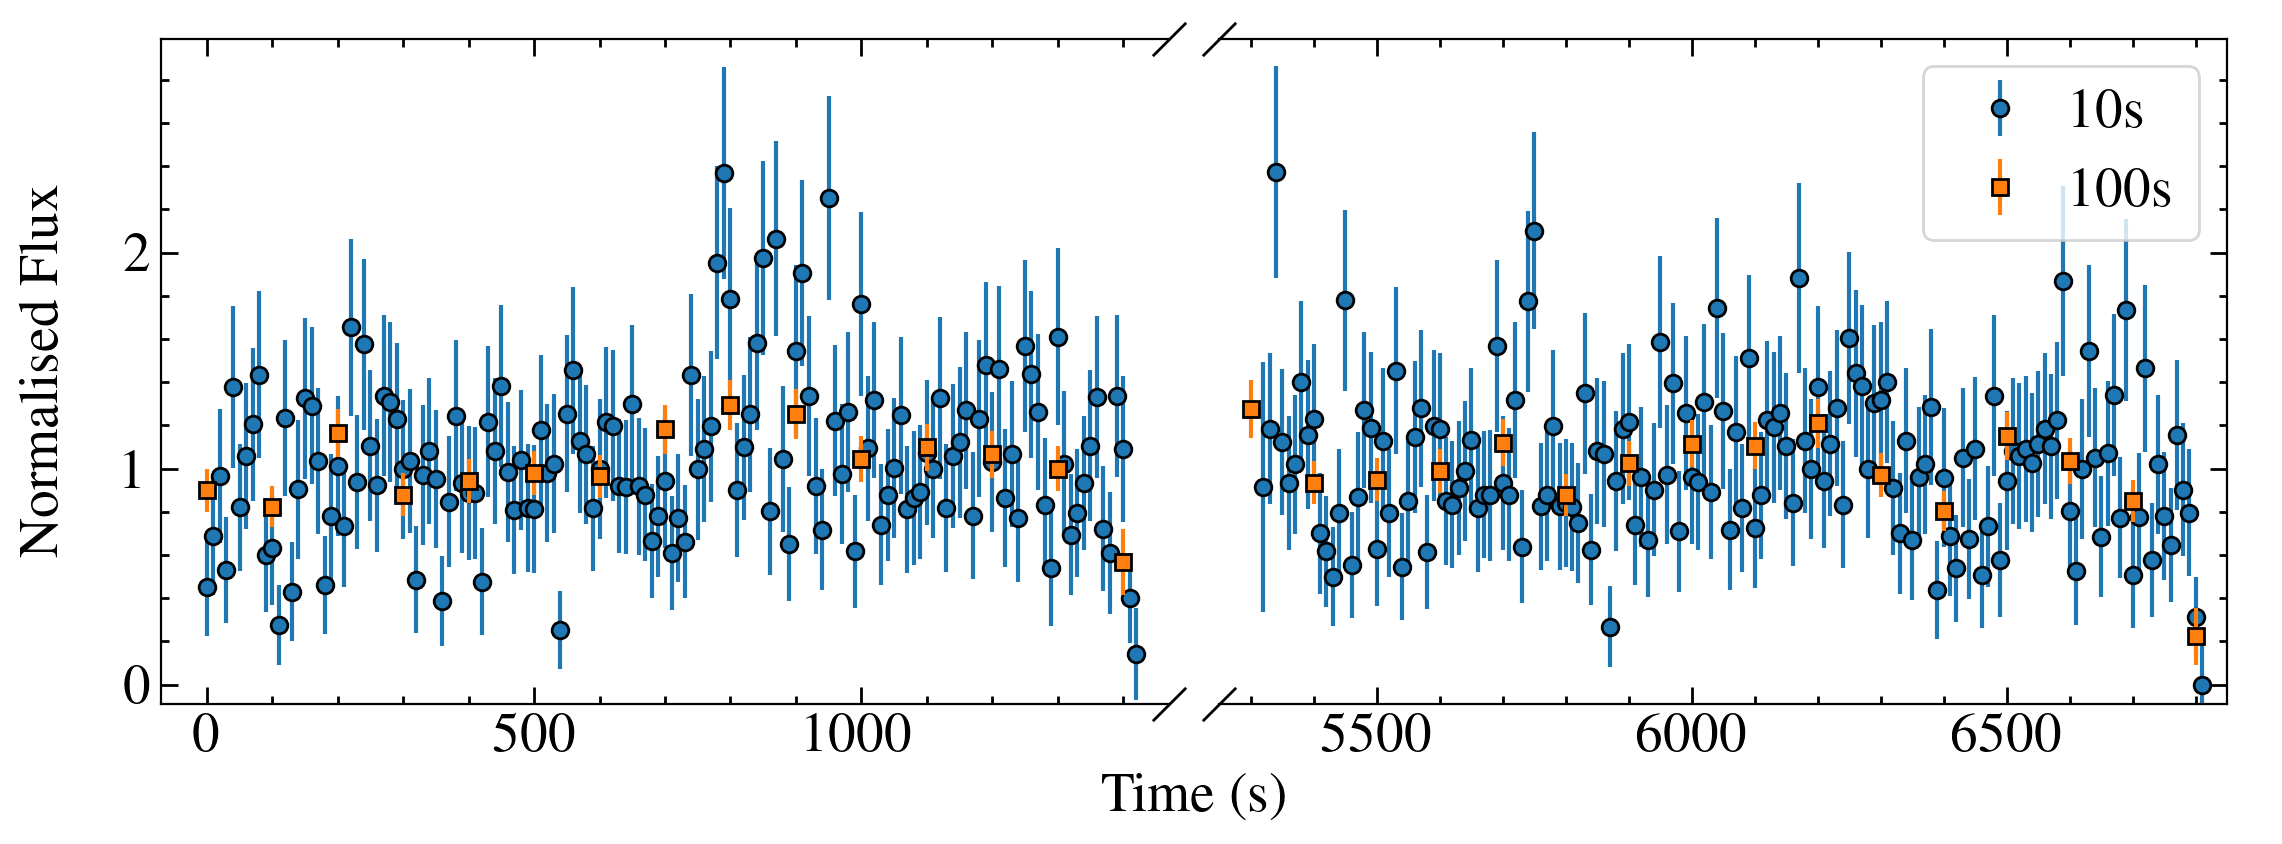

In [14]:
fig, axes = plt.subplots(ncols=2, sharey = True, figsize=(12, 5)) 



m = ['o', 's']
zorders = [-10, 10]
labels = ['10s', '100s']

for i,  lc in enumerate(lcs[::-1]):
    for j in range(len(axes)):
    
        data = fits.getdata(lc, 1)
        # ts, flc, elc = data['TIME'][:-2]-data['TIME'][0], data['AB_FLUX_AA'][:-2], data['AB_FLUX_AA_ERR'][:-2]
        ts, flc, elc = data['TIME']-data['TIME'][0], data['AB_FLUX_AA'], data['AB_FLUX_AA_ERR']
        flcn, elcn = flc/np.median(flc), elc/np.median(flc)
        axes[j].errorbar(ts, flcn, yerr = elcn, marker=m[i], ls='none', markeredgecolor='k', zorder=zorders[i], label=labels[i])


axes[0].set_ylim(-0.09, 2.99) # should only need to set the ylims on the first subplot because sharey = True
axes[0].set_xlim(-70, 1470) #setting up the ranges that the plots will cover. One row per subplot
axes[1].set_xlim(5250, 6850)

axes[1].legend(frameon=True)

"""
Everything between here and the next docstring should work regardless of how many subplots you have
"""

#setting up the slanted lines
d = 1.  # proportion of vertical to horizontal extent of the slanted line
kwargs = dict(marker=[(-1, -d), (1, d)], markersize=12,
              linestyle="none", color='k', mec='k', mew=1, clip_on=False)

for i in range(len(axes)):
    
    # axes[i].scatter(xs, ys, edgecolor='k') #add the points to each plot
    
    if i > 0: #turn off yticks for everything except the first plot
        axes[i].yaxis.set_tick_params(labelleft=False)
      
    if i != len(axes)-1: #do these things for every subplot exept the last
        axes[i].spines.right.set_visible(False) #turn off right ax
        axes[i].tick_params(right = False, which='both') #turn off right ticks
        axes[i].plot([1, 1], [0, 1], transform=axes[i].transAxes, **kwargs) #add the slanted line to the right corners
   
    if i > 0: #do these things for every subplot except the first
        axes[i].spines.left.set_visible(False) #as for the last loop but for the left
        axes[i].tick_params(left = False, which='both')
        axes[i].plot([0, 0], [1, 0], transform=axes[i].transAxes, **kwargs)
        
"""
Just the axes labels beyond this.
"""

    
#add a frame that goes around all the subplots to add the labels       
bigax = fig.add_subplot(111, frame_on=False)
bigax.tick_params(labelcolor='none', top=False, bottom=False, left=False, right=False, which='both')
bigax.set_ylabel('Normalised Flux') #change labelpad if the label is overlapping the tick labels
bigax.set_xlabel('Time (s)')
# bigax.set_title('Example plot with split x axis', pad =15) 

fig.tight_layout()
fig.subplots_adjust(wspace=0.05) #change the gap in between the subplots


In [15]:
swiftlc = Table.read('/media/david/2tb_ext_hd/hddata/carmenes_binary/gj207.1/swift/xrt/USERPROD_247053/lc/curve.qdp')
# swiftlc
xtime = swiftlc['col1']
xcounts = swiftlc['col2']
xcounts_e = np.array([swiftlc['col2_perr'], abs(swiftlc['col2_nerr'])])

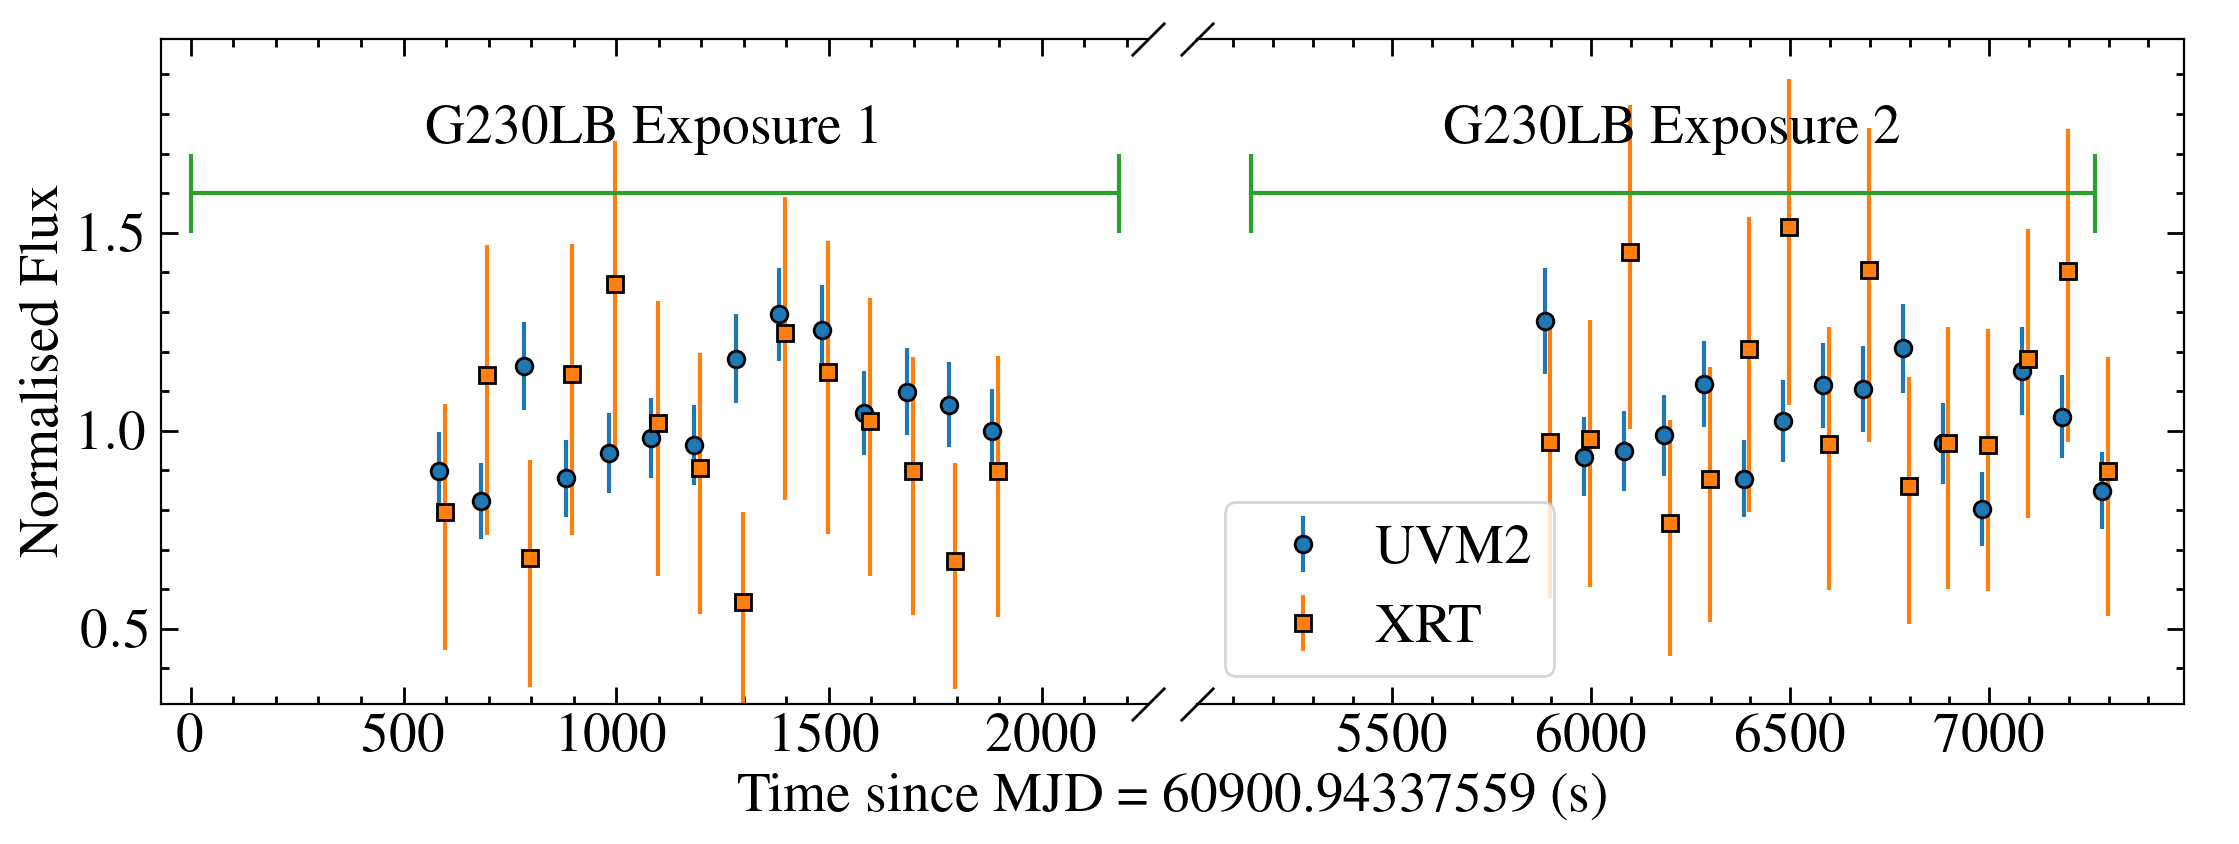

In [16]:
fig, axes = plt.subplots(ncols=2, sharey = True, figsize=(12, 5)) 

#swift reference times
ref_mjd = 51910
ref_sec = ref_mjd * 86400

xref = 650034242.0006 #different for X-ray

#hst start and end times
starts = []
ends = []
for x in sx1s:
    hdr = fits.getheader(x, 0)
    starts.append(hdr['TEXPSTRT'])
    ends.append(hdr['TEXPEND'])

mjd0 = min(starts)


m = ['o', 's']
zorders = [-10, 10]
cadences = (10, 100)

line = 1.6
# for i,  lc in enumerate(lcs[::-1][1]):
for j in range(len(axes)):

    #uvot
    data = fits.getdata(lcs[0], 1)
    # ts, flc, elc = data['TIME'][:-2]-data['TIME'][0], data['AB_FLUX_AA'][:-2], data['AB_FLUX_AA_ERR'][:-2]
    ts, flc, elc = data['TIME'], data['AB_FLUX_AA'], data['AB_FLUX_AA_ERR']
    t_mjd = ts  + ref_sec - mjd0 *86400
    flcn, elcn = flc/np.median(flc), elc/np.median(flc)
    mask = flcn > 0.6 #removing last point
    # axes[j].errorbar(t_mjd, flcn, yerr = elcn, marker=m[i], ls='none', markeredgecolor='k', zorder=zorders[i], label=r'UVM2 ({}\,s)'.format(cadences[]))
    axes[j].errorbar(t_mjd[mask], flcn[mask], yerr = elcn[mask], marker='o', ls='none', markeredgecolor='k', label=r'UVM2')

    #xrt
    xmask = xtime > 82000 #just this observation
    xt = xtime[xmask] + xref + ref_sec- mjd0 *86400
    xf, xe = xcounts[xmask] / np.median(xcounts[xmask]), np.array([xcounts_e[0][xmask] / np.median(xcounts[xmask]), xcounts_e[1][xmask] / np.median(xcounts[xmask])]) 
    axes[j].errorbar(xt, xf, yerr = xe, marker='s', ls='none', markeredgecolor='k', label=r'XRT')
    
    #stis
    # axes[j].plot([(starts[j]-mjd0)*86400, (ends[j]-mjd0)*86400], [3, 3])
    axes[j].errorbar([(starts[j]-mjd0)*86400, (ends[j]-mjd0)*86400], [line, line], yerr=[0.1, 0.1])
    axes[j].annotate('G230LB Exposure {}'.format(j+1), (((ends[j]-mjd0)+(starts[j]-mjd0))*86400/2, line*1.1), va='center', ha='center')


    

axes[0].set_ylim(0.31, 1.99) # should only need to set the ylims on the first subplot because sharey = True
axes[0].set_xlim(-70, 2250) #setting up the ranges that the plots will cover. One row per subplot
axes[1].set_xlim(5010, 7490)

# axes[0].legend(frameon=True, loc=3)
axes[1].legend(frameon=True, loc=3)

"""
Everything between here and the next docstring should work regardless of how many subplots you have
"""

#setting up the slanted lines
d = 1.  # proportion of vertical to horizontal extent of the slanted line
kwargs = dict(marker=[(-1, -d), (1, d)], markersize=12,
              linestyle="none", color='k', mec='k', mew=1, clip_on=False)

for i in range(len(axes)):
    
    # axes[i].scatter(xs, ys, edgecolor='k') #add the points to each plot
    
    if i > 0: #turn off yticks for everything except the first plot
        axes[i].yaxis.set_tick_params(labelleft=False)
      
    if i != len(axes)-1: #do these things for every subplot exept the last
        axes[i].spines.right.set_visible(False) #turn off right ax
        axes[i].tick_params(right = False, which='both') #turn off right ticks
        axes[i].plot([1, 1], [0, 1], transform=axes[i].transAxes, **kwargs) #add the slanted line to the right corners
   
    if i > 0: #do these things for every subplot except the first
        axes[i].spines.left.set_visible(False) #as for the last loop but for the left
        axes[i].tick_params(left = False, which='both')
        axes[i].plot([0, 0], [1, 0], transform=axes[i].transAxes, **kwargs)
        
"""
Just the axes labels beyond this.
"""

    
#add a frame that goes around all the subplots to add the labels       
bigax = fig.add_subplot(111, frame_on=False)
bigax.tick_params(labelcolor='none', top=False, bottom=False, left=False, right=False, which='both')
bigax.set_ylabel('Normalised Flux') #change labelpad if the label is overlapping the tick labels
bigax.set_xlabel('Time since MJD = {} (s)'.format(mjd0))
# bigax.set_title('Example plot with split x axis', pad =15) 

fig.tight_layout()
fig.subplots_adjust(wspace=0.05) #change the gap in between the subplots

fig.savefig('plots/g207d1_swift_lcs.pdf')


In [17]:
np.median(flcn[mask]), np.std(flcn[mask]), np.std(flcn[mask])/ np.median(flcn[mask]) 

(np.float32(1.0248014), np.float32(0.13401736), np.float32(0.13077399))

In [18]:
(np.array(ends)-np.array(starts))*86400

array([2180.99174404, 2119.00838418,  144.01584025])

In [19]:
def fix_g230lb_scatter(fitsfile, Vmag, return_Slambda = False):
    """
    Fixes the scattered light in STIS G230LB with the cookbook from https://www.stsci.edu/files/live/sites/www/files/home/hst/instrumentation/stis/documentation/instrument-science-reports/_documents/2022_05.pdf
    """
    #collecting relevant information
    hdul = fits.open(fitsfile)
    data = hdul[1].data[0]
    wavelength, net, flux = data['WAVELENGTH'], data['NET'], data['FLUX']
    gain = hdul[0].header['ATODGAIN']
    net *= gain
    sensitivity = flux / net
    hdul.close()
    
    #calculating correction curve
    K0 = 426 * 10**(-0.4*Vmag)
    Slambda = K0 * (1.0+0.00104 * (wavelength - 2000))
    net_corr = net - Slambda
    flux_corr = net_corr * sensitivity

    if return_Slambda:
        return flux_corr, Slambda
    else:
        return flux_corr

Fixing the red leak. Assume that the companion doesn't matter for now and see where that gets us. Use the two x1ds files to build a curve that can then be applied to the coadd? Or adjust both files and make a new coadd

In [21]:
# # fig, ax = plt.subplots()

# vmag = 11.499

# for x in sx1s[0:2]:
#     fig, ax = plt.subplots()
    
#     # print(x)
#     grating = fits.getheader(x, 0)['OPT_ELEM'] 
#     # print(grating)
#     hdul = fits.open(x)
#     dt = hdul[1].data
#     data = dt[0]
#     w, f, e= data['WAVELENGTH'], data['FLUX'], data['ERROR']

#     mask = (f > -1e-13) & (f < 1.3e-13)

#     ax.step(w[mask], f[mask], where='mid', alpha=0.5)
#     f_corr ,slambda= fix_g230lb_scatter(x, vmag,  return_Slambda =True)
#     ax.step(w[mask], f_cor[mask], where='mid', alpha=0.5)
#     corr = f_cor/f
#     coor = convolve(corr, Box1DKernel(50))
#     # ax.plot(w, slambda)
#     ax.errorbar(uw, uf, yerr=ue, xerr=ufwhm/2, marker='o', ls='none', markeredgecolor='k')
#     # ax.plot(mw, mf)
    
#     bp_w, bp_cc = np.loadtxt('/home/david/work/filters/uvot/Swift_UVOT.UVM2.dat', unpack=True)
#     simphot, simphot_e = make_phot(bp_w, bp_cc, w[mask], f[mask], e=e[mask])
    
    
#     ax.errorbar(uw, simphot, yerr=simphot_e, xerr=ufwhm/2, marker='s', ls='none', markeredgecolor='k')
    
#     print(uf, simphot, uf/simphot)

#     simphot, simphot_e = make_phot(bp_w, bp_cc, w[mask], f_corr[mask], e=e[mask])
    
    
#     ax.errorbar(uw, simphot, yerr=simphot_e, xerr=ufwhm/2, marker='p', ls='none', markeredgecolor='k')
    
#     print(uf, simphot, uf/simphot)

#     dt['FLUX'] = f_cor
#     rootname = hdul[0].header['ROOTNAME']
#     hdul.writeto('{}fluxcorr/{}_corr_sx1.fits'.format(path, rootname.lower()), overwrite=True)
  
#     # print(ue, simphot_e)
#     # print(uf/ue)
    
#     # ax.set_ylim(-1e-14, 1e-13)
# # ax.set_xlim(2200, 3050)
# # ax.set_xlim(2750, 2850)
#     ax.set_ylim(5e-16)
#     ax.set_yscale('log')
#     # ax.set_ylim(0, 5)
#     # ax.axhline(1, ls='--', c='C2')



In [ ]:
path

[1.2576399e-15] 1.3886539007071131e-15 [0.90565396] [0.02613501]
[3.5183853e-17] 9.829048628178011e-18
[35.744804]


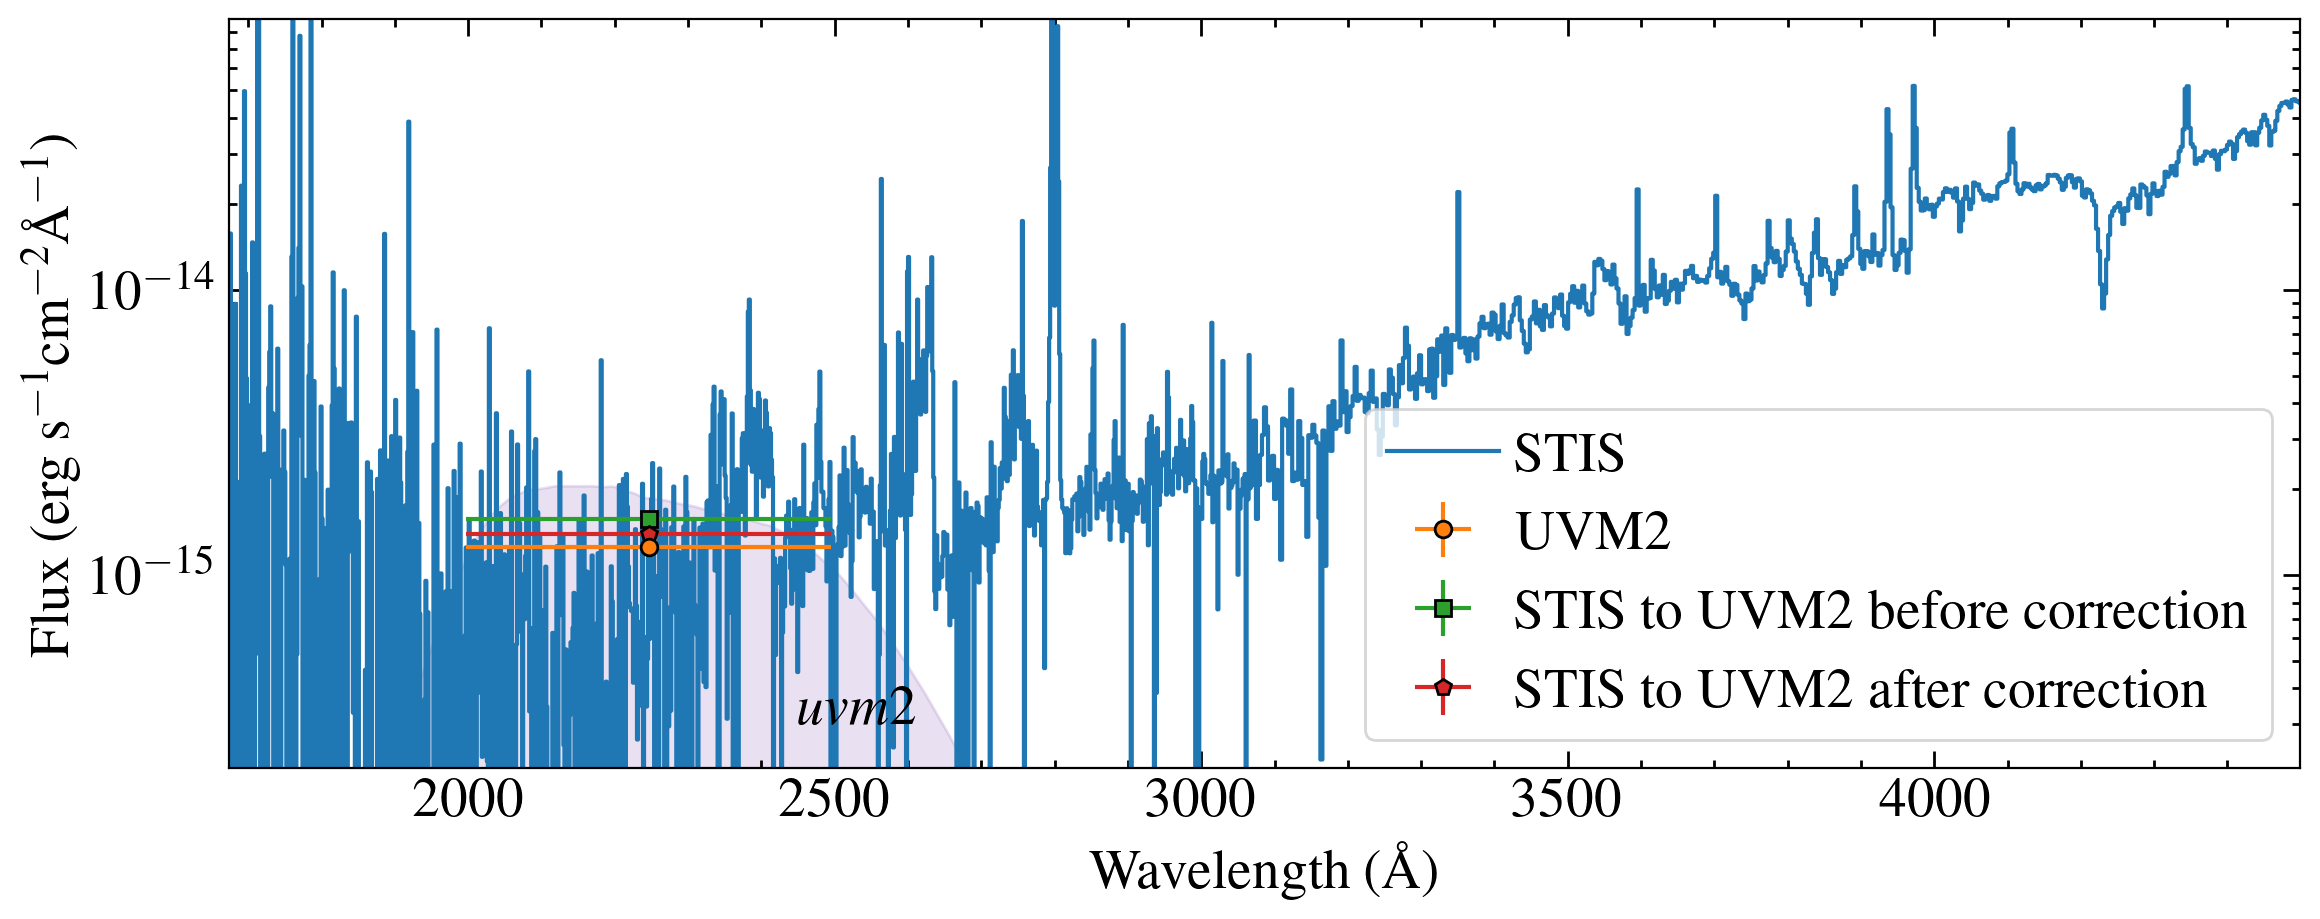

In [22]:
fig, ax = plt.subplots(figsize=(12, 5))

corspec = '{}fluxcorr/hst_17778_stis_gj-207d1_g230lb-g430l_ofem_cspec.fits'.format(path)
data = fits.getdata(corspec, 1)[0]
w, f, e= data['WAVELENGTH'], data['FLUX'], data['ERROR']

fi = convolve(f, Box1DKernel(2))
ax.step(w, f, where='mid', label = 'STIS')

# gmask = (gw > w[0]) & (gw < w[-1])
# ax.step(gw[gmask], gf[gmask]*gj_scale/scale2, where='mid')

ax.set_yscale('log')

ax.set_ylim(2.1e-16, 0.89e-13)

ax.errorbar(uw, uf, yerr=ue, xerr=ufwhm/2, marker='o', ls='none', markeredgecolor='k', label='UVM2', zorder=10)
# ax.plot(mw, mf)

bp_w, bp_cc = np.loadtxt('/home/david/work/filters/uvot/Swift_UVOT.UVM2.dat', unpack=True)
simphot, simphot_e = make_phot(bp_w, bp_cc, w, f, e=e)

# ax1= ax.twinx()
# ax1.plot(bp_w, bp_cc)
# ax.plot(bp_w, bp_cc*1e-16)
ax.fill_between(bp_w, bp_cc*1e-16, alpha=0.2, zorder=-10, color='C4')
ax.annotate(r'$uvm2$', (2450, 3e-16))


ax.errorbar(uw, pre_phot, yerr=pre_phot_e, xerr=ufwhm/2, marker='s', ls='none', markeredgecolor='k', label = 'STIS to UVM2 before correction')

ax.errorbar(uw, simphot, yerr=simphot_e, xerr=ufwhm/2, marker='p', ls='none', markeredgecolor='k', label= 'STIS to UVM2 after correction')

print(uf, simphot, uf/simphot, uf/simphot*((ue/uf)**2+(simphot_e/simphot)**2)**0.5)
print(ue, simphot_e)
print(uf/ue)


ax.legend(frameon=True, loc =4)

ax.set_ylabel(r'Flux (erg s$^{-1}$cm$^{-2}$\AA$^{-1}$)', size=20)
ax.set_xlabel(r'Wavelength (\AA)', size=20)

ax.set_xlim(w[0], 4499)

fig.tight_layout()

# fig.savefig('plots/g207d1_stis_v_uvm2.pdf')

XRT - added back to previous plot

In [ ]:
# swiftlc = Table.read('/media/david/2tb_ext_hd/hddata/carmenes_binary/gj207.1/swift/xrt/USERPROD_247053/lc/curve.qdp')
# # swiftlc
# stime = swiftlc['col1']
# scounts = swiftlc['col2']
# scounts_e = [swiftlc['col2_perr'], abs(swiftlc['col2_nerr'])]

In [23]:
# fig, ax = plt.subplots()

# ax.errorbar(stime, scounts, yerr=scounts_e, marker='o', ls='none')

Check XRT spectra for all visits, find LX, compile proxy spectra.
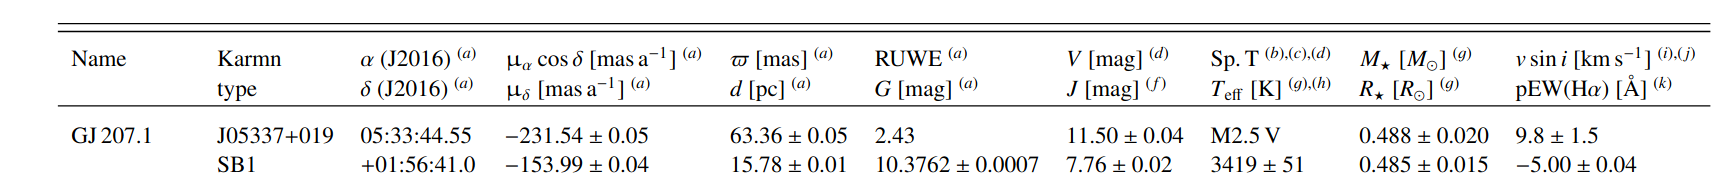

https://www.swift.ac.uk/user_objects/tprods/USERPROD_250361/spec/index.php

[6.08108108 5.87837838 4.58108108]


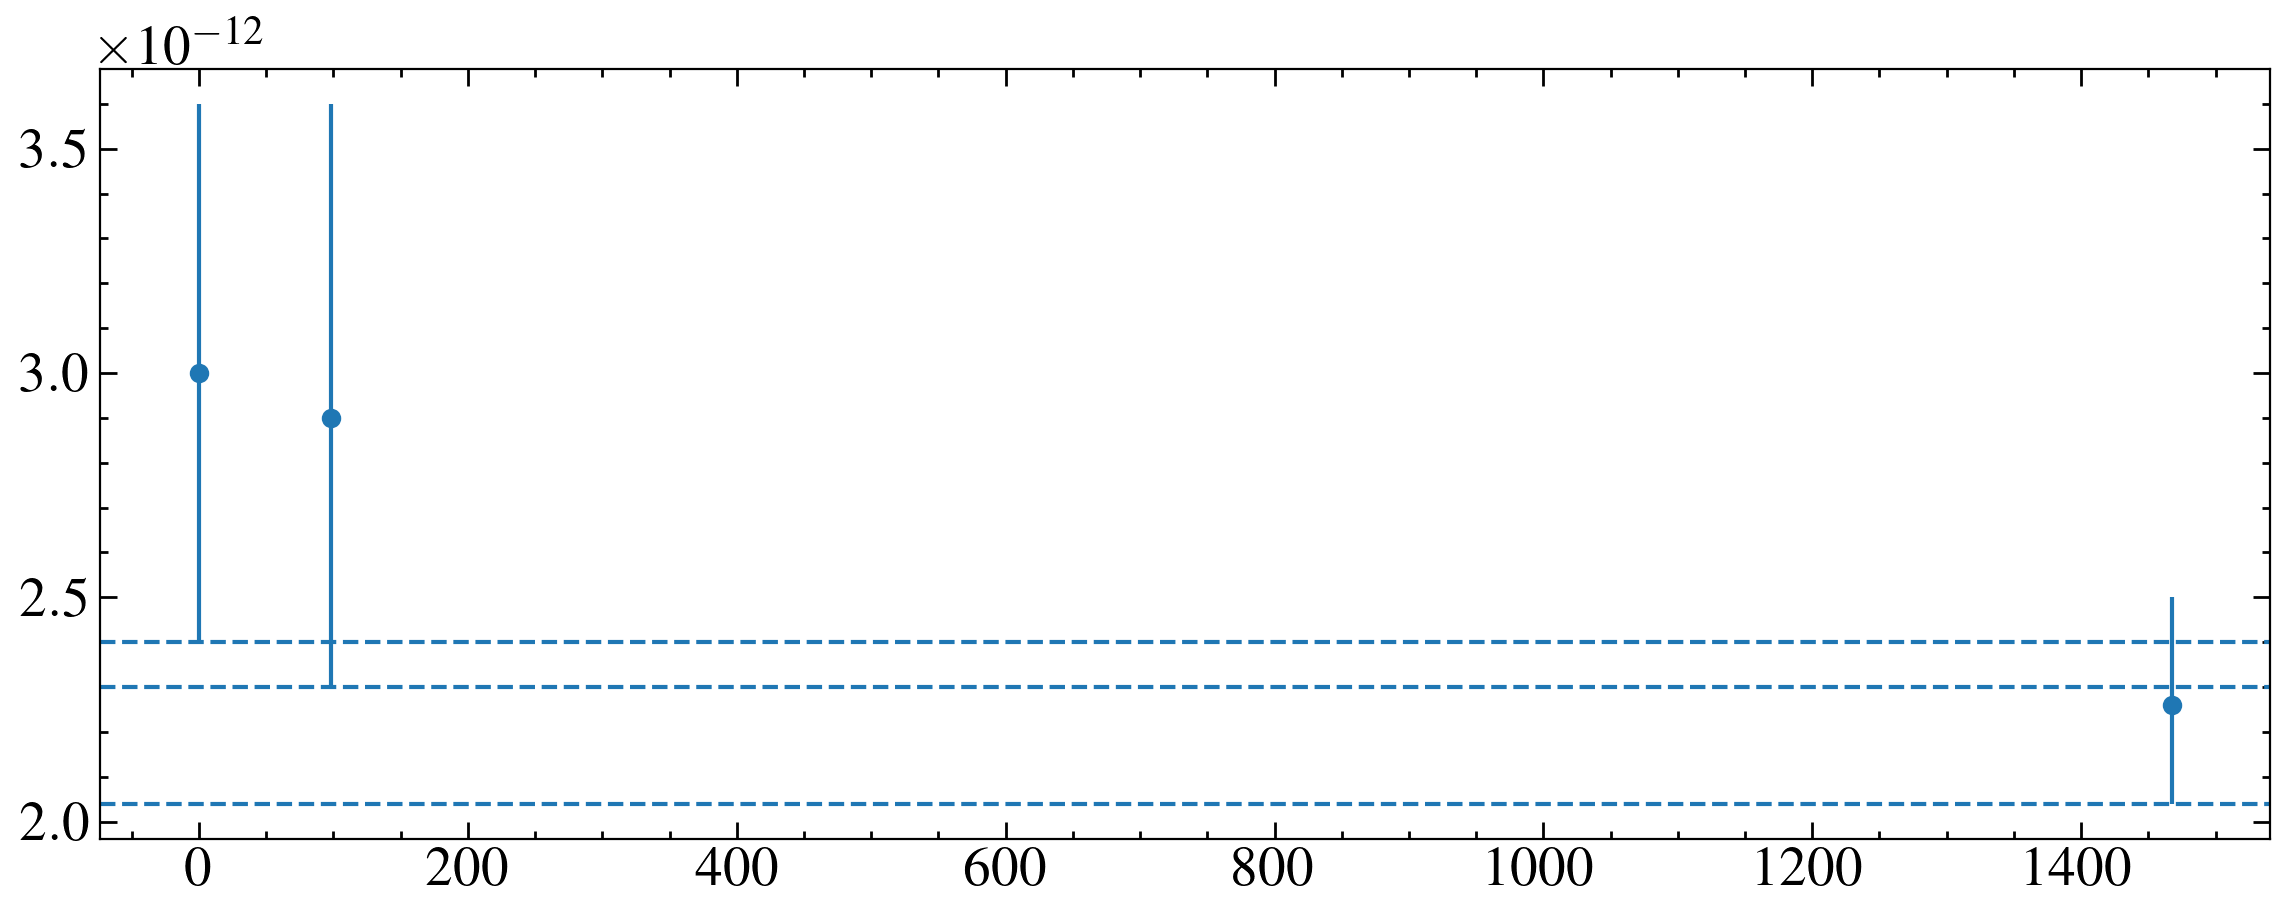

In [40]:
fxs = [3e-12, 2.9e-12, 2.26e-12] # erg/s/cm2
fxeu = [0.6e-12, 0.7e-12, 0.24e-12]
fxel = [0.6e-12, 0.6e-12,0.22e-12]
kts = [0.83, 1.01, 0.839]
kteu = [0.13, 0.25, 0.073]
ktel =[0.19, 0.17, 0.111]
t0s = ['2021-08-07T13:00:34', '2021-11-13T23:10:34', '2025-08-13T22:44:24'] # from archive
t0s = Time(t0s, format='isot', scale='utc')
t0smjd = t0s.mjd
t0 = min(t0mjd)
# t0mjd
fig, ax = plt.subplots()

ax.errorbar(t0smjd - t0, fxs, yerr=[fxel, fxeu], ls ='none', marker='o')
[ax.axhline(fx - el, ls='--') for fx, el in zip(fxs, fxel)]

print(fxs/(np.mean([fxeu, fxel])))

Ok fxs all within 1 sigma, use the most recent as it's where our observations were and has the longest exposure time.

In [44]:
const.sigma_sb

<<class 'astropy.constants.codata2018.CODATA2018'> name='Stefan-Boltzmann constant' value=5.6703744191844314e-08 uncertainty=0.0 unit='W / (m2 K4)' reference='CODATA 2018'>

In [65]:
prot = 0.60435 *u.d
# r0 
vmag = 11.5 #b+21
ksmag = 6.855 #vizer
# log τ = 0.64+0.10−0.12 + 0.25+0.08−0.07 (V − Ks ), wright+18
logtau = 0.64 + 0.25*(vmag -ksmag)
Ro = prot/ 10**logtau
teff = 3419*u.K
Rstar = 0.485*u.Rsun
Lstar = (const.sigma_sb * 4* np.pi * (Rstar.to(u.m))**2 * teff**4).to(u.erg/u.s)
dstar = 15.78 *u.pc
fx, fxe = 2.26e-12, 0.23e-12 # 3rd observation 
Lx = fx*(u.erg/u.s/u.cm**2) * 4*np.pi*(dstar.to(u.cm))**2
print(Lx, Lx/Lstar, Ro)

6.73338413469161e+28 erg / s 0.0006074183442021197 0.009550773075685916 d


Make the activity plot and update it when more data comes in. Calculate uncertainty better later, at the moment assume fx dominates

In [78]:
xpath = '/media/david/2tb_ext_hd/hddata/carmenes_binary/xraycat/'
xraycat = fits.open('{}J_ApJ_743_48_catalog.dat.fits'.format(xpath))
xraydata = xraycat[1].data

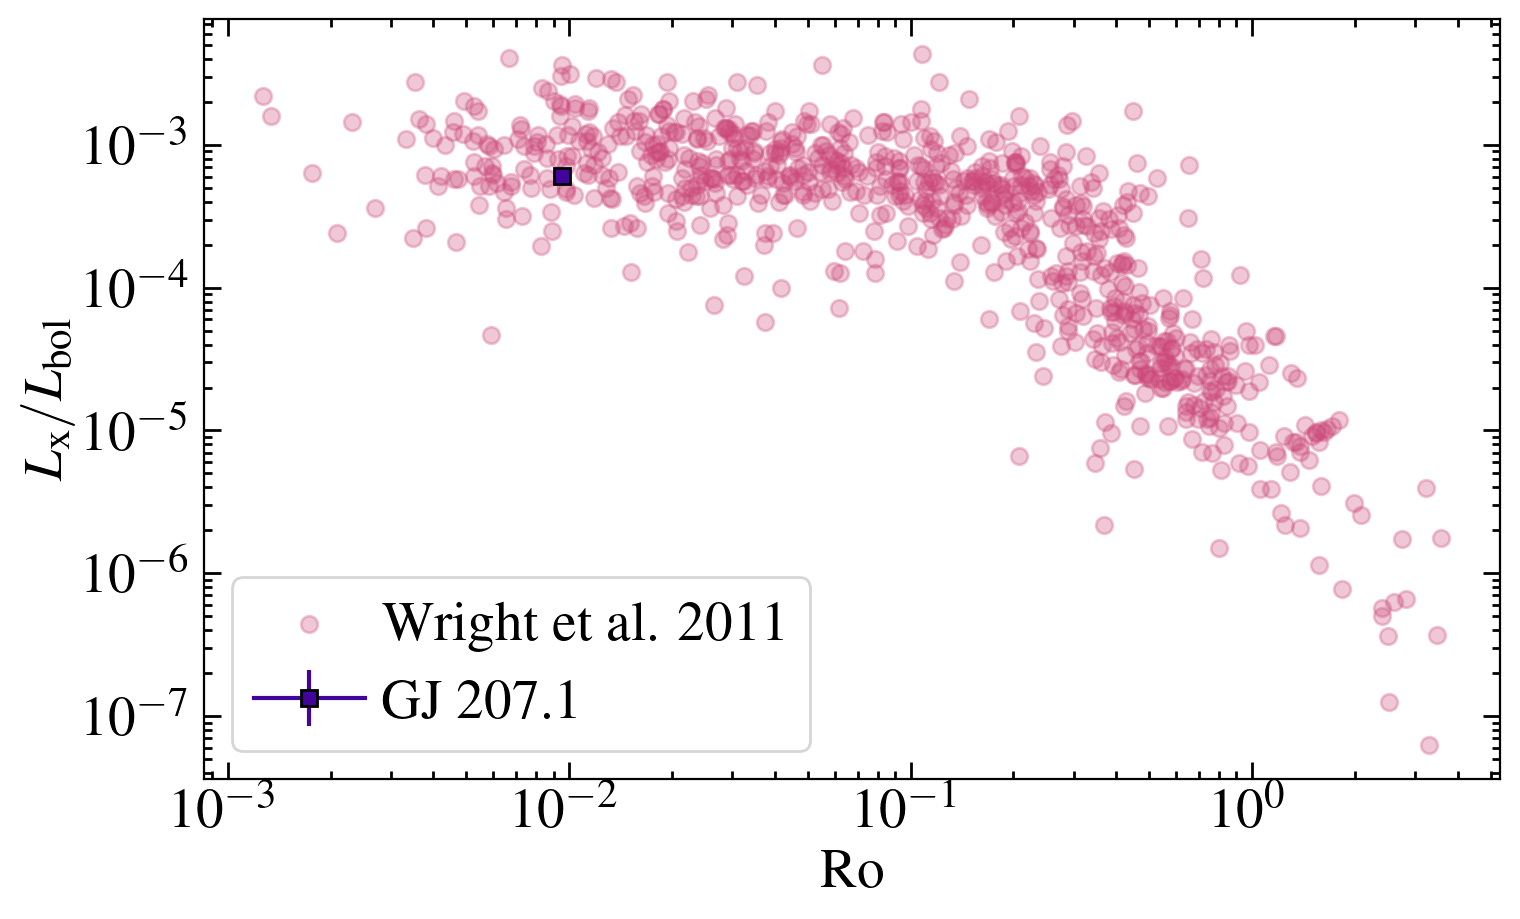

In [80]:
fig, ax = plt.subplots(figsize=(8,5))

prots = xraydata['Prot']
vks = xraydata['V-K']
ros = prots / 10**(0.64 + 0.25*vks)

ax.errorbar(Ro, Lx/Lstar, yerr=((fxe/fx) * (Lx/Lstar)), marker = 's', label ='GJ 207.1', zorder=10, markeredgecolor='k', color=plt.cm.plasma(0.1))
    
ax.scatter(ros, 10**xraydata['Lx/bol'], marker='o', alpha=0.3, label='Wright et al. 2011', color=plt.cm.plasma(0.5))
ax.set_xscale('log')
ax.set_yscale('log')
handles, labels = plt.gca().get_legend_handles_labels()
by_label = dict(zip(labels, handles))
ax.legend(by_label.values(), by_label.keys(), frameon=True)

# ax.set_xlim(0.15, 55)

# plt.legend()
# ax.set_xlabel('$P_{\mathrm{orb}}$ (d)')
ax.set_xlabel('Ro')
ax.set_ylabel(r'$L_{\mathrm{x}}/L_{\mathrm{bol}}$')
fig.tight_layout()
# plt.savefig('../plots/eg_uma_Lx_prot.png', facecolor='w')
# plt.savefig('../plots/eg_uma_Lx_prot.pdf', facecolor='w')
# fig.savefig('../../eg_uma/swift_prop/plots/lx_prot.pdf')

proxies
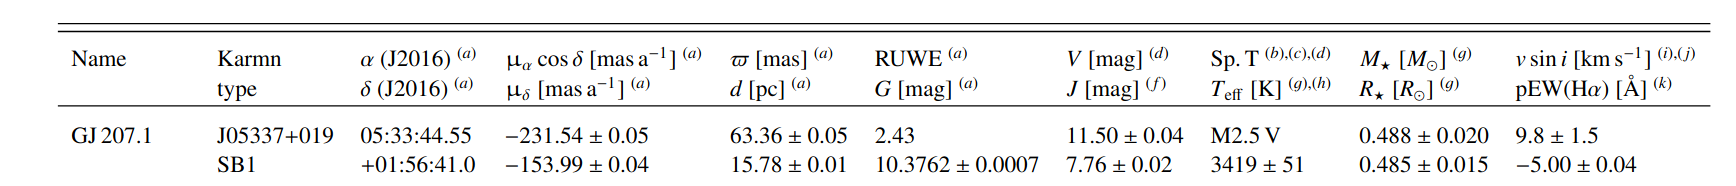


In [90]:
proxies = [ 'gj436', 'GJ674', 'GJ163']
teff = [3477, 3404, 3460, ]
survey = [  'm', 'mm', 'mm']
prot = [ 48, 32.9, 61] # all a bit slow
dists = [ 9.775, 4.553, 15.135]*u.pc

mpath = '/media/david/2tb_ext_hd/hddata/mega_muscles/'

# for i, proxy in enumerate(proxies):
#     # print(proxy)
#     starpath = '{}v26_hlsp_fixed/{}/'.format(mpath, proxy)
#     if survey[i] == 'm':
#         starpath = '{}muscles_hlsp/{}/'.format(mpath, proxy)
#     nuv = glob.glob('{}*230*.fits'.format(starpath))
#     opt = glob.glob('{}*430*.fits'.format(starpath))
#     print(proxy, nuv, opt)
    

1.5784299408545528e-12 3.5625522888070816e-13
1.6561045226752114e-11 9.868718753109717e-13
2.2480072488881063e-12 8.768654192547661e-14


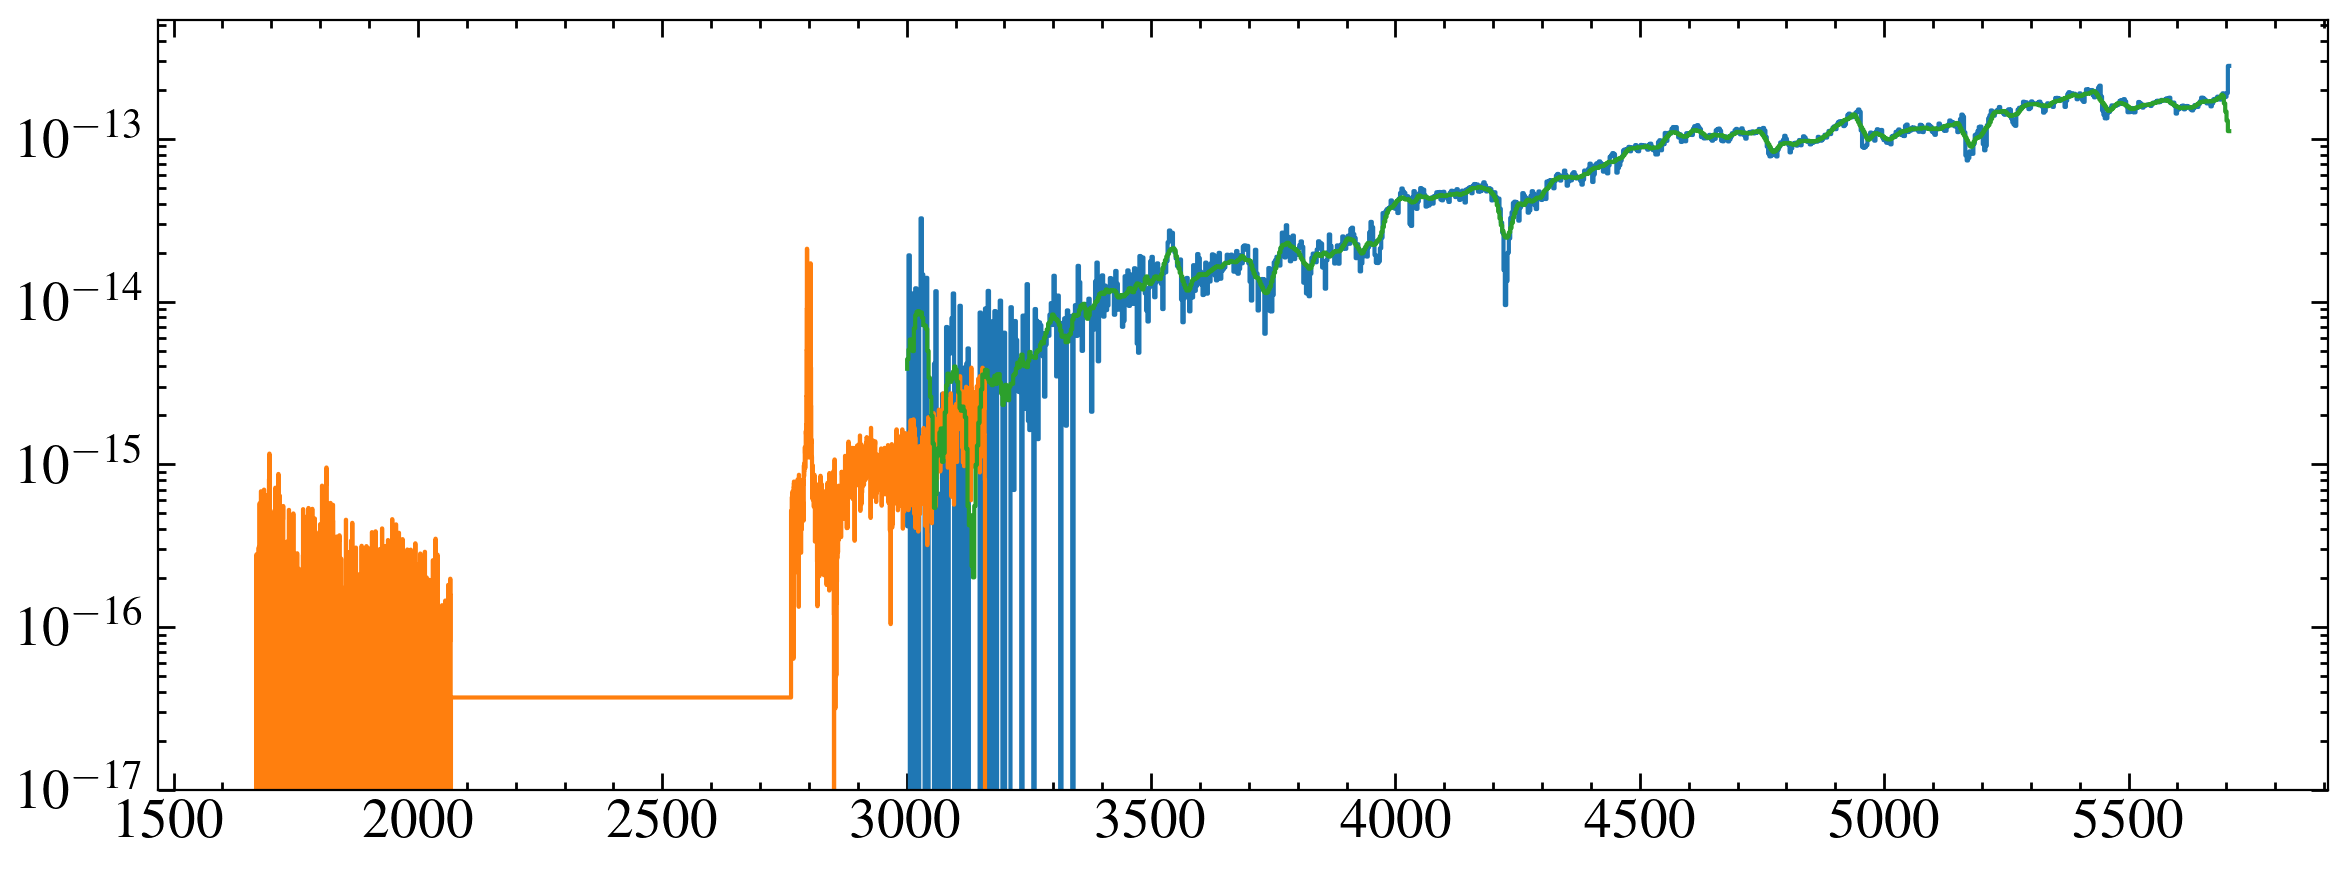

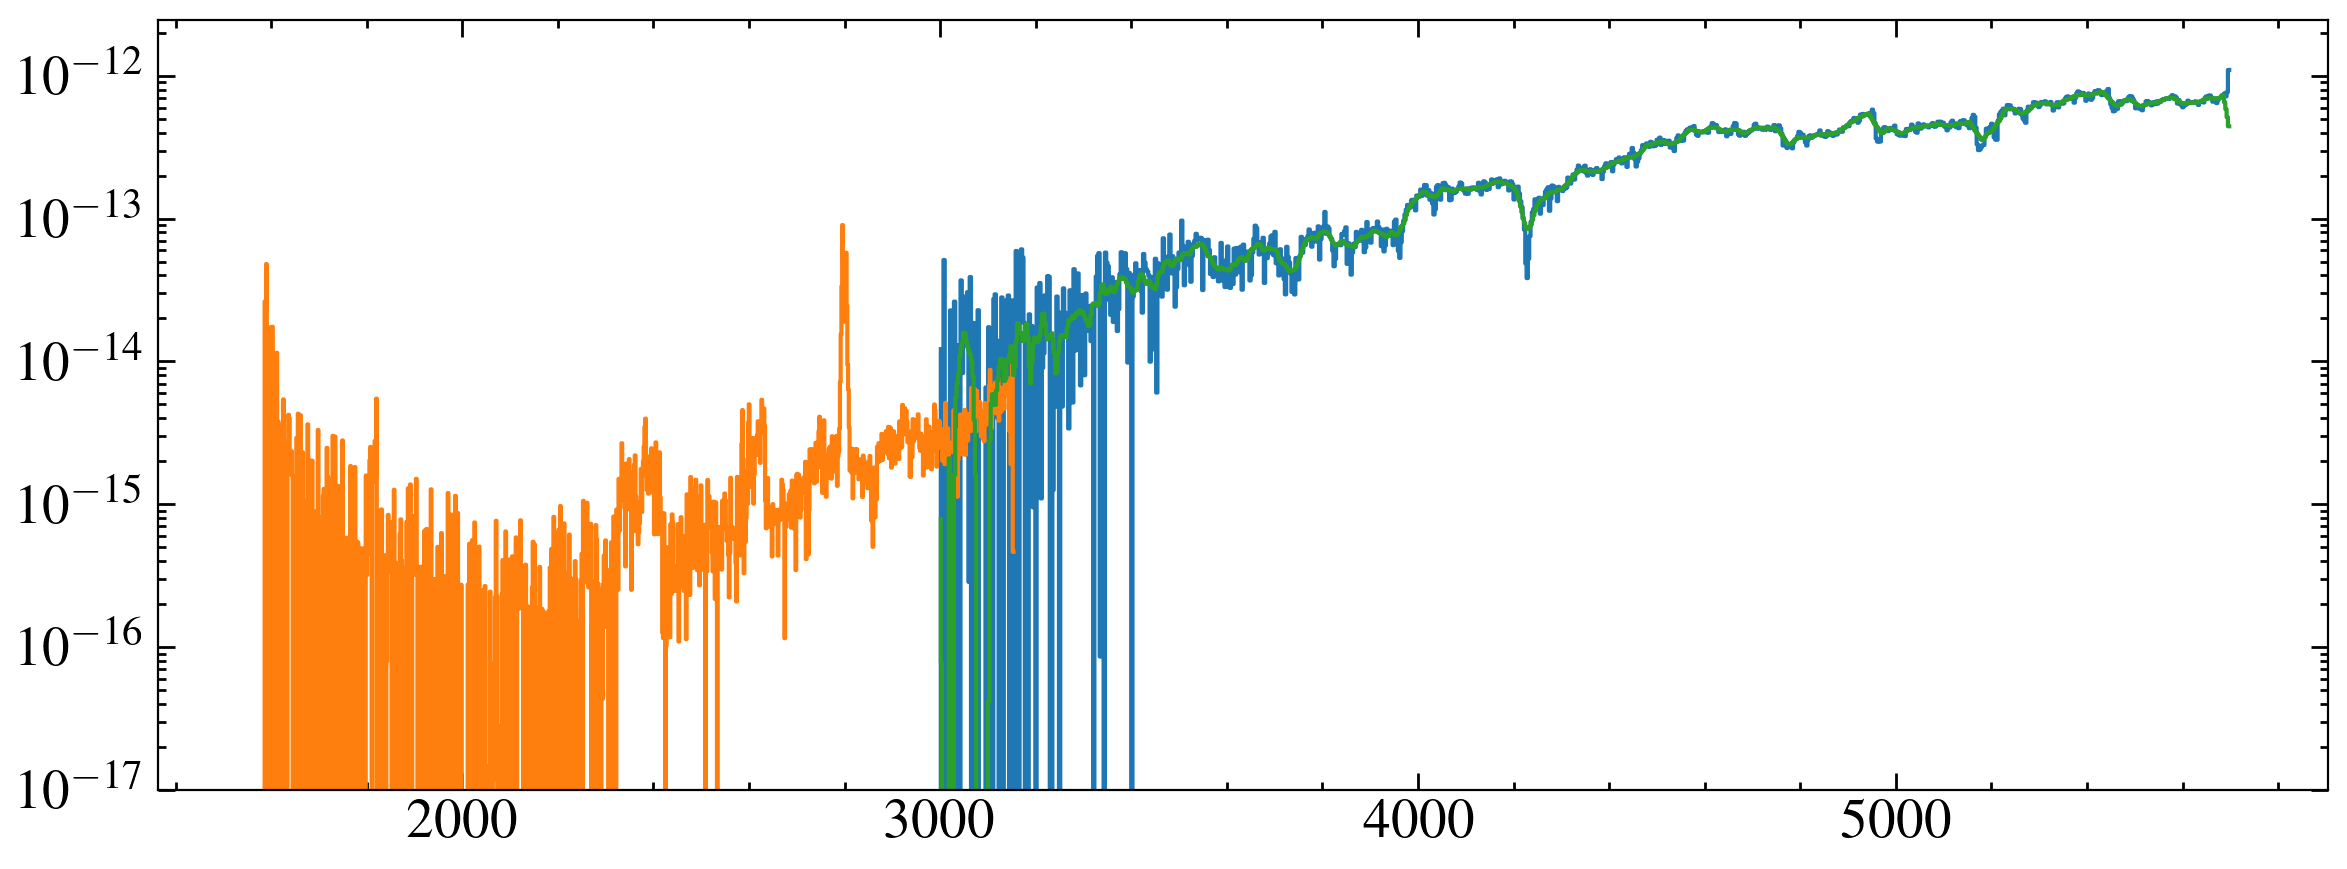

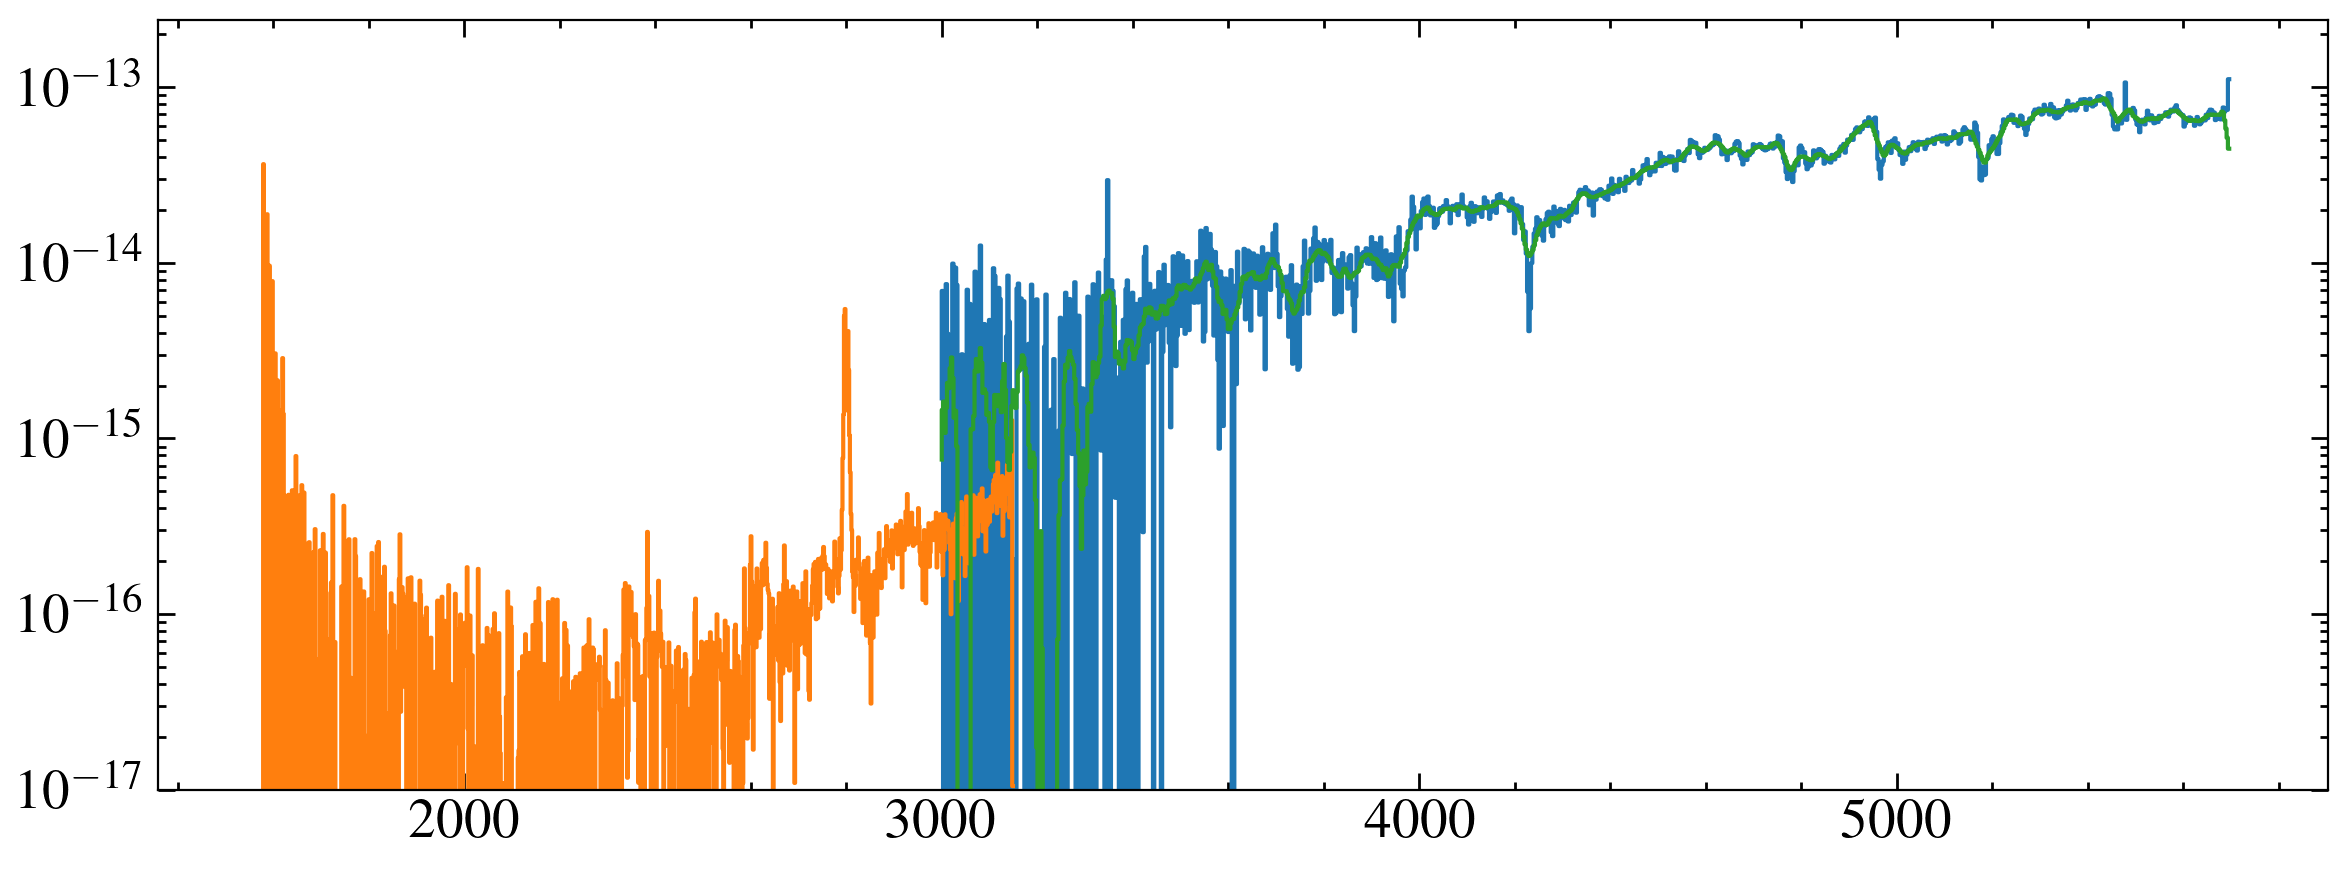

In [101]:
for i, proxy in enumerate(proxies):
    # print(proxy)
    fig, ax = plt.subplots()
    starpath = '{}v26_hlsp_fixed/{}/'.format(mpath, proxy)
    if survey[i] == 'm':
        starpath = '{}muscles_hlsp/{}/'.format(mpath, proxy)
    nuvpath = glob.glob('{}*230*.fits'.format(starpath))[0]
    optpath = glob.glob('{}*430*.fits'.format(starpath))[0]
    opt = fits.getdata(optpath, 1)
    nuv = fits.getdata(nuvpath, 1)
    ow, of = opt['WAVELENGTH'], opt['FLUX']
    nw, nf = nuv['WAVELENGTH'], nuv['FLUX']

    nw1 = nw[-1]
    ow0 = ow[0]
    oflux = np.trapezoid(of[(ow < nw1)], ow[(ow < nw1)])
    nflux = np.trapezoid(nf[(nw > ow0)], nw[(nw > ow0)])
    print(oflux, nflux)
    
    omask = (ow > 3000)
    nmask = (nw < 3300)
    scale = (dists[i]/dstar)**2
    ax.step(ow[omask], of[omask])
    ax.step(nw[nmask], nf[nmask])

    ofi = convolve(of, Box1DKernel(10))
    ax.step(ow[omask], ofi[omask])
    
    ax.set_yscale('log')
    ax.set_ylim(1e-17)
    

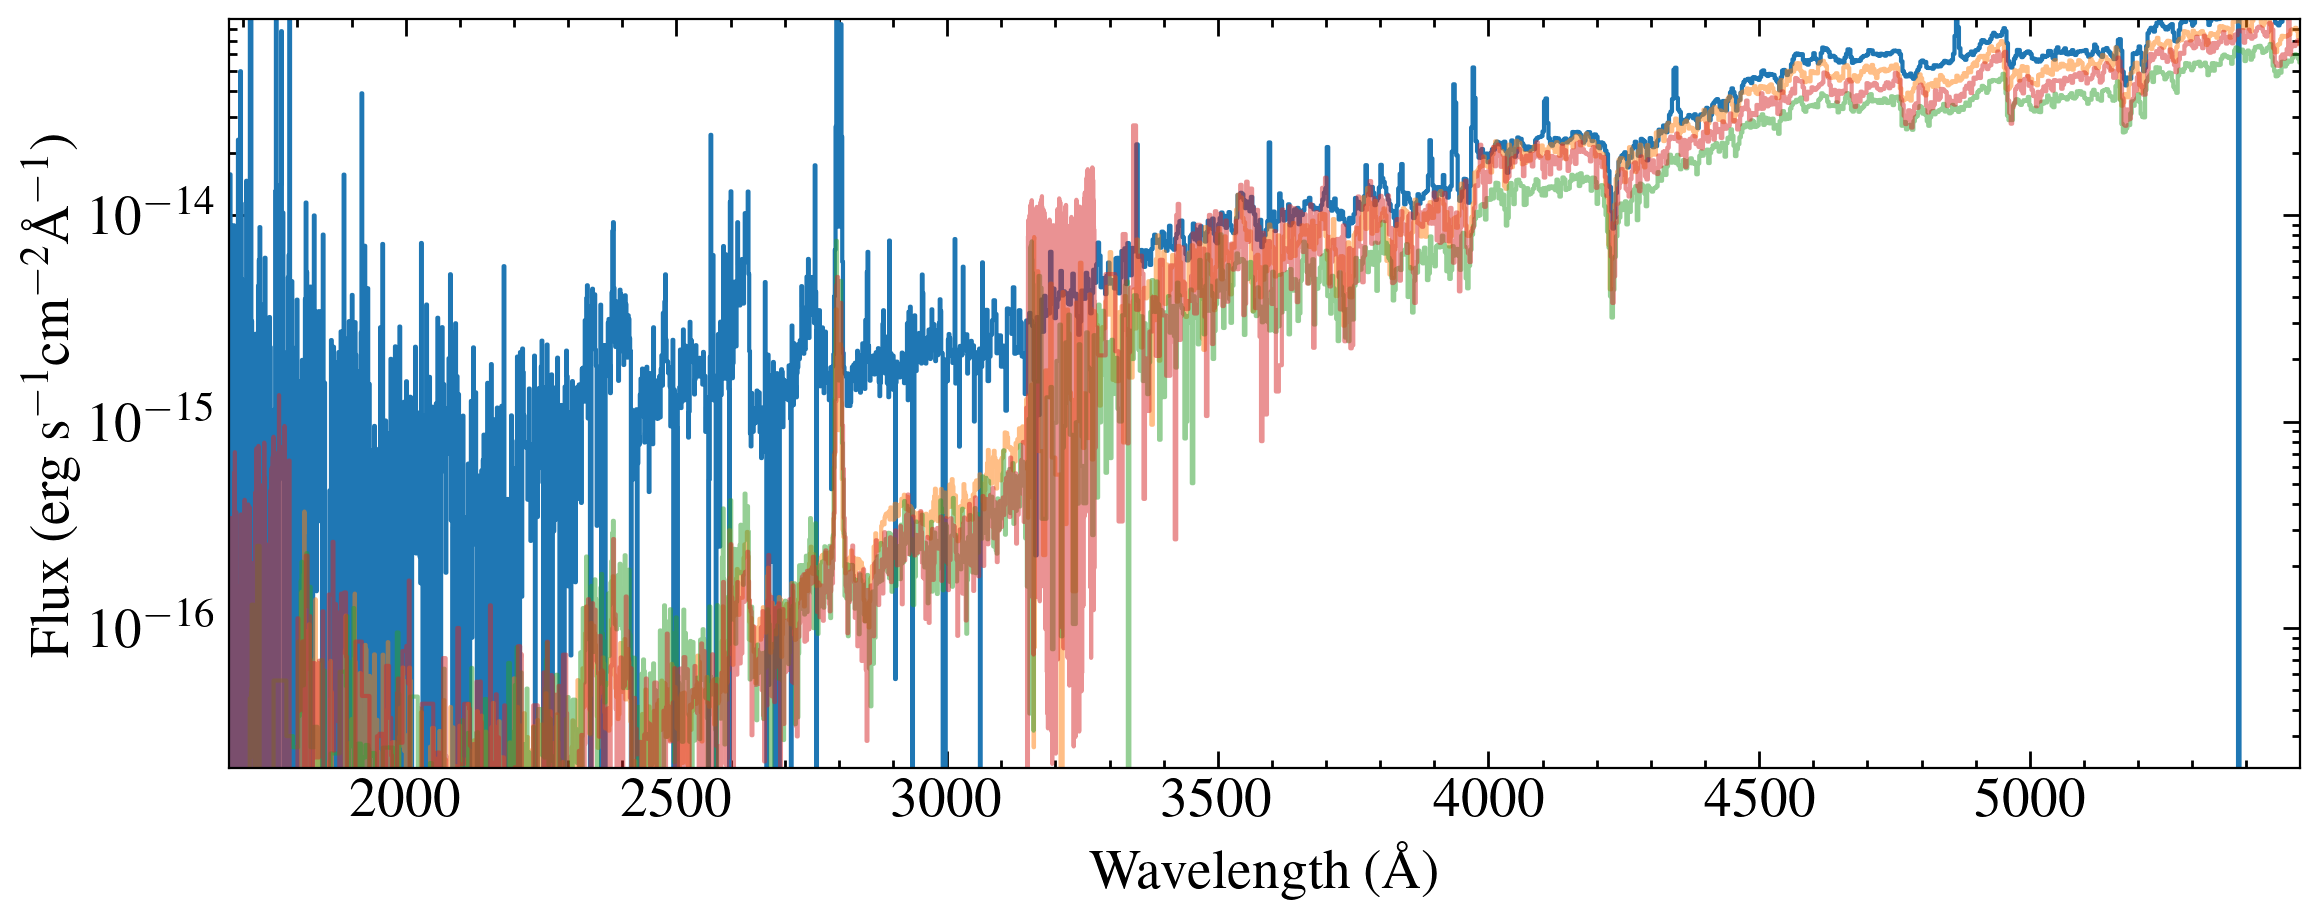

In [104]:
fig, ax = plt.subplots(figsize=(12, 5))

corspec = '{}fluxcorr/hst_17778_stis_gj-207d1_g230lb-g430l_ofem_cspec.fits'.format(path)
data = fits.getdata(corspec, 1)[0]
w, f, e= data['WAVELENGTH'], data['FLUX'], data['ERROR']

fi = convolve(f, Box1DKernel(2))
ax.step(w, f, where='mid', label = 'STIS')

# gmask = (gw > w[0]) & (gw < w[-1])
# ax.step(gw[gmask], gf[gmask]*gj_scale/scale2, where='mid')


cols = np.linspace(0, 0.99, len(proxies))
for i, proxy in enumerate(proxies):
    # print(proxy)
    starpath = '{}v26_hlsp_fixed/{}/'.format(mpath, proxy)
    if survey[i] == 'm':
        starpath = '{}muscles_hlsp/{}/'.format(mpath, proxy)
    scale = (dists[i]/dstar)**2
    sedpath = glob.glob('{}*var-res-sed.fits'.format(starpath))[0]
    sed = fits.getdata(sedpath, 1)
    pw, pf = sed['WAVELENGTH'], sed['FLUX']
    mask = (pw >= w[0]) & (pw <=w[-1])
    pw, pf = pw[mask], pf[mask]
    ax.step(pw, pf*scale, alpha=0.5)
    # nuvpath = glob.glob('{}*230*.fits'.format(starpath))[0]
    # optpath = glob.glob('{}*430*.fits'.format(starpath))[0]
    # opt = fits.getdata(optpath, 1)
    # nuv = fits.getdata(nuvpath, 1)
    # ow, of = opt['WAVELENGTH'], opt['FLUX']
    # nw, nf = nuv['WAVELENGTH'], nuv['FLUX']
    # omask = (ow > 3500)
    # nmask = (nw < 3100)
    

    # scale = (dists[i]/dstar)**2
    # ax.step(ow[omask], of[omask]*scale, c='C{}'.format(i+1), alpha=0.5)
    # ax.step(nw[nmask], nf[nmask]*scale, c='C{}'.format(i+1), alpha=0.5)
    
    



ax.set_yscale('log')

ax.set_ylim(2.1e-17, 0.89e-13)
# ax.legend(frameon=True, loc =4)

ax.set_ylabel(r'Flux (erg s$^{-1}$cm$^{-2}$\AA$^{-1}$)', size=20)
ax.set_xlabel(r'Wavelength (\AA)', size=20)

ax.set_xlim(w[0], 5499)

fig.tight_layout()

# fig.savefig('plots/g207d1_stis_v_uvm2.pdf')

In [105]:
np.log10(0.83)

np.float64(-0.08092190762392612)